# 1007 FINAL PROJECT
PythonPioneers (Shivam, Kathleena, Ryan, Isha)

What's the 411 on 311? An Analysis of Housing Service Requests in the NYC Area.

December 7, 2022

### Installations

In [1]:
#pip install geopandas

In [2]:
#pip install --upgrade matplotlib

## Merging & Cleaning Data

In [3]:
# imports.
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from scipy import stats
import statistics
import time 
import datetime as dt
import re
import geopandas as gpd
import scipy
from scipy import stats
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
from IPython.core.display import display, HTML

/var/folders/ft/gx6q37cs4x97wkdnqyhznp7r0000gn/T/ipykernel_4495/3649880222.py:19: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### The below cell was used to merge the original 15 files into a single file. We are just using the merged file which was an output from this as the input in cell 3 since it takes less time to run. We have uploaded both the merged file and the original 15 files for your refrence so that you can potentially test both. The 15 files does take time to load since its approx ~7.3gb of data. the merged file is much quicker to load since we only kept the relevant columns and let go of the rest

In [4]:
# merge 15 datasets (split by dates) into one large 311 Complaints dataset, grouped by zip code and created date.
'''
years = np.arange(2018, 2023)
num_files = len(years) * 3
start_m = ['01', '05', '09']
end_m = ['04', '08', '12']
# create list of filenames that will be read in.
filenames = [''] * num_files
i = 0
for y in years:
    for j in range(len(start_m)):
        filenames[i] = '311_Requests_' + str(y) + '-' + start_m[j] + '_' + str(y) + '-' + end_m[j] + '.csv' 
        i += 1
# specify dtypes for columns in CSV files (to avoid Pandas warnings / for efficiency).
str_col_names = ('Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type',
                 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1',
                 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type',
                 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',
                 'Resolution Action Updated Date', 'Community Board', 'Borough', 'Open Data Channel Type',
                 'Park Facility Name', 'Park Borough', 'Vehicle Type', 'Taxi Company Borough',
                 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
                 'Bridge Highway Segment', 'Location')
float_col_names = ('BBL', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude', 'Longitude')
col_dtypes = dict.fromkeys(str_col_names, str)
col_dtypes.update(dict.fromkeys(float_col_names, 'float64'))
col_dtypes['Unique Key'] = 'int64'
# read in each csv file, group by specified columns, and aggregate specified columns.
# save each as a dataframe within a list.
i = 0
all_df = [0] * num_files
for f in filenames:
    df_temp = pd.read_csv(f, dtype = col_dtypes)
    print(f + '  read')
    df_temp['Created Date'] = pd.to_datetime(df_temp['Created Date'])
    df_temp['Closed Date'] = pd.to_datetime(df_temp['Closed Date'])
    df_temp['Closing Time'] = np.where(df_temp['Closed Date'] >= df_temp['Created Date'], 
                                  (df_temp['Closed Date'] - df_temp['Created Date']).dt.days, np.nan)
    df_temp['Created Date'] = df_temp['Created Date'].dt.strftime('%Y-%m')
    fill_cols = ['Complaint Type', 'Location Type', 'Incident Zip']
    df_temp[fill_cols] = df_temp[fill_cols].fillna('na')
    df_temp['Incident Zip'] = df_temp['Incident Zip'].replace('(-[^-]*)$', '', regex = True)
    df_grouped = df_temp.groupby(['Created Date', 'Complaint Type', 'Location Type', 'Incident Zip'], 
                            as_index=False).agg(TotalClosingTime = ('Closing Time', 'sum'),
                                                Count = ('Unique Key', 'count'),
                                                Count_closed = ('Closing Time', 'count'))
    all_df[i] = df_grouped
    i += 1
# combine list of dataframes together into one dataframe.
df = pd.concat(all_df, ignore_index = True)
'''

"\nyears = np.arange(2018, 2023)\nnum_files = len(years) * 3\nstart_m = ['01', '05', '09']\nend_m = ['04', '08', '12']\n# create list of filenames that will be read in.\nfilenames = [''] * num_files\ni = 0\nfor y in years:\n    for j in range(len(start_m)):\n        filenames[i] = '311_Requests_' + str(y) + '-' + start_m[j] + '_' + str(y) + '-' + end_m[j] + '.csv' \n        i += 1\n# specify dtypes for columns in CSV files (to avoid Pandas warnings / for efficiency).\nstr_col_names = ('Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type',\n                 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1',\n                 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type',\n                 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',\n                 'Resolution Action Updated Date', 'Community Board', 'Borough', 'Open Data Channel Type',\n    

In [5]:
# check combined df.
df= pd.read_csv('311_Service_Requests_2018-2022_grouped.csv')
display(df)

,Created Date,Complaint Type,Location Type,Incident Zip,TotalClosingTime,Count,Count_closed
0,2018-01,APPLIANCE,RESIDENTIAL BUILDING,10002,91.0,6,6
1,2018-01,APPLIANCE,RESIDENTIAL BUILDING,10003,75.0,4,4
2,2018-01,APPLIANCE,RESIDENTIAL BUILDING,10009,43.0,7,7
3,2018-01,APPLIANCE,RESIDENTIAL BUILDING,10010,82.0,2,2
4,2018-01,APPLIANCE,RESIDENTIAL BUILDING,10012,22.0,2,2
...,...,...,...,...,...,...,...
1038793,2022-11,Wood Pile Remaining,Street,11416,1.0,1,1
1038794,2022-11,Wood Pile Remaining,Street,11426,0.0,1,0
1038795,2022-11,X-Ray Machine/Equipment,Hospital,11434,14.0,1,1
1038796,2022-11,X-Ray Machine/Equipment,Other (Explain Below),11434,40.0,3,3


### Create clean zip codes

In [6]:
# obtain unique zip codes.
new_copy = df.copy()
new_copy['Incident Zip'] = new_copy['Incident Zip'].astype(str)
uniq_zip = new_copy['Incident Zip'].unique()
uniq_zip
df_zip = pd.DataFrame(uniq_zip, columns = ['Incident Zip'])

In [7]:
# clean the unique zip codes.
for i, rows in df_zip.iterrows():
    ifor_val = df_zip.iloc[i]['Incident Zip']
    if re.match(r"^\d{9}$", ifor_val):
        zipc = ifor_val[:5]
        ifor_val = zipc
    elif re.match(r"^\d{5}-$", ifor_val):
        zipc = ifor_val[:5]
        ifor_val = zipc
    elif re.match(r"^\d{5}-\d{4}$", ifor_val):
        ifor_val = ifor_val[:5]  
    elif re.match(r"^\d{5}$", ifor_val):
        ifor_val = df_zip.iloc[i]['Incident Zip']
    elif re.match(r"^\d{5}.0$", ifor_val):
        ifor_val = ifor_val[:5]
    else:
        ifor_val = np.nan
    df_zip.at[i,'Clean_zip'] = ifor_val

### Merge clean zips

In [8]:
# left merge.
df_new2 = pd.merge(df,df_zip, how = 'left', on='Incident Zip')
print(df_new2.shape)
print(df.shape)
df_new2['Clean_zip'].unique()[:10]

(1038798, 8)
(1038798, 7)


array(['10002', '10003', '10009', '10010', '10012', '10014', '10019',
       '10021', '10022', '10023'], dtype=object)

### Cleaned data: take out zips that don't make sense (not 5 digit-numbers)

In [9]:
# clean dataframe of zip codes.
df_new3 = df_new2[df_new2['Clean_zip'].notnull()]
df_new3
df_new3['Clean_zip'].unique()
df_new3
df_new3['Clean_zip'] = df_new3['Clean_zip'].astype(int)
df_new3.dtypes
print(df_new2.shape)
print(df_new3.shape)

(1038798, 8)
(1032072, 8)


/var/folders/ft/gx6q37cs4x97wkdnqyhznp7r0000gn/T/ipykernel_4495/1969579985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new3['Clean_zip'] = df_new3['Clean_zip'].astype(int)


### Clean the dataframe

In [10]:
# rename df.
df_311 = df_new3
# drop all records of DF where 'Created Date' is NaN.
df_311= df_311[df_311['Created Date'].notna()]
# created date. 
created_date_df = df_311['Created Date']
print(created_date_df)
print(created_date_df.shape)

0          2018-01
1          2018-01
2          2018-01
3          2018-01
4          2018-01
            ...   
1038793    2022-11
1038794    2022-11
1038795    2022-11
1038796    2022-11
1038797    2022-11
Name: Created Date, Length: 1032072, dtype: object
(1032072,)


In [11]:
# convert to list.
created_date_list = created_date_df.tolist()
print(created_date_list[0])
print(type(created_date_list[0]))

2018-01
<class 'str'>


In [12]:
# convert to datetime.
df_311['Created Date'] =  pd.to_datetime(df_311['Created Date'])
# view.
display(df_311)
print(df_311.head())
print(df_311.shape)

,Created Date,Complaint Type,Location Type,Incident Zip,TotalClosingTime,Count,Count_closed,Clean_zip
0,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10002,91.0,6,6,10002
1,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10003,75.0,4,4,10003
2,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10009,43.0,7,7,10009
3,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10010,82.0,2,2,10010
4,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10012,22.0,2,2,10012
...,...,...,...,...,...,...,...,...
1038793,2022-11-01,Wood Pile Remaining,Street,11416,1.0,1,1,11416
1038794,2022-11-01,Wood Pile Remaining,Street,11426,0.0,1,0,11426
1038795,2022-11-01,X-Ray Machine/Equipment,Hospital,11434,14.0,1,1,11434
1038796,2022-11-01,X-Ray Machine/Equipment,Other (Explain Below),11434,40.0,3,3,11434


  Created Date Complaint Type         Location Type Incident Zip  \
0   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10002   
1   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10003   
2   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10009   
3   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10010   
4   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10012   

   TotalClosingTime  Count  Count_closed  Clean_zip  
0              91.0      6             6      10002  
1              75.0      4             4      10003  
2              43.0      7             7      10009  
3              82.0      2             2      10010  
4              22.0      2             2      10012  
(1032072, 8)


In [13]:
# filter for dates between January 1, 2018 & current.
filter_date = pd.to_datetime('2018-01-01')
df_311_new = df_311[df_311['Created Date'] >= filter_date]
print(df_311_new.head())
print(df_311_new.shape)

  Created Date Complaint Type         Location Type Incident Zip  \
0   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10002   
1   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10003   
2   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10009   
3   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10010   
4   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10012   

   TotalClosingTime  Count  Count_closed  Clean_zip  
0              91.0      6             6      10002  
1              75.0      4             4      10003  
2              43.0      7             7      10009  
3              82.0      2             2      10010  
4              22.0      2             2      10012  
(1032072, 8)


## Reading the rest of the neccessary files

In [14]:
# read in StreetEasy rent data.
df_rent = pd.read_csv("medianAskingRent.csv")
# reading the file with zipcode territory structure & 
# neighborhood, borough name, population estimate.
mod_zta = pd.read_csv('Modzta to zipcode_v1.0.csv')
# reading the mapping file for location type - public vs residential etc.
loc_map = pd.read_csv('location type unique_mapping.csv')
# read in file - shape file for NYC neighborhoods/zipcode. We have MODZCTA here instead of zipcode as the zipcode was created by the post office and does not correspond to the actual geometry
gdf_co = gpd.read_file('MODZCTA_2010.shp')
display(gdf_co.head())
# shape file for NYC boroughs.
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

,MODZCTA,label,geometry
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21..."
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19..."
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20..."
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958...."
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19..."


### Merging neighborhood names, borough, population estimate and median rent by month and year in the data file

In [15]:
# analyze rent information.
rent_dates = df_rent.columns.tolist()
print(len(rent_dates))
print(rent_dates[:20])
rent_dates_datetime_list = []
print('examples: ')
print(rent_dates[3])
print(rent_dates[156])
# look at df.
display(df_rent)

157
['areaName', 'Borough', 'areaType', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05']
examples: 
2010-01
2022-10


,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,4500.0,4595.0,4595.0,4710.0,4800.0,4775.0,4800.0,4800.0,4900.0,4902.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,4314.0,4350.0,4300.0,4400.0,4425.0,4400.0,4476.0,4300.0,4395.0,4380.0
2,All Upper East Side,Manhattan,submarket,2450.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,3408.0,3500.0,3400.0,3400.0,3500.0,3500.0,3500.0,3738.0,3743.0,3800.0
3,All Upper Manhattan,Manhattan,submarket,1836.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2396.0,2400.0,2422.0,2500.0,2550.0,2700.0,2795.0,2750.0,2700.0,2700.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,3995.0,4000.0,4075.0,4237.0,4244.0,4200.0,4402.0,4495.0,4500.0,4550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Windsor Terrace,Brooklyn,neighborhood,1550.0,1600.0,1650.0,1600.0,1800.0,1825.0,1995.0,...,2988.0,2900.0,3000.0,3200.0,3050.0,3000.0,3428.0,3750.0,3376.0,3125.0
194,Woodhaven,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2200.0,2300.0,2300.0,2288.0,2450.0,2000.0,2400.0,2075.0,1950.0,2275.0
195,Woodlawn,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Woodside,Queens,neighborhood,1813.0,NaN,1398.0,2000.0,1475.0,1488.0,NaN,...,1963.0,1927.0,2000.0,1900.0,1900.0,2100.0,2200.0,2200.0,2300.0,2250.0


In [16]:
# creating a function for renaming neighborhoods to easily match across the two datasets.
def rename_nh(df):
    '''
    Neighborhoods were not matching across the rent file and the zip code file and this function helps to make
    the neighborhood names consistent across the datasets by changing the neighborhoods in one of them to match
    the other
    input -> Pandas dataframe
    '''
    staten_island = ('Annadale', 'Arrochar', 'Bloomfield', 'Charleston',
       'Elm Park', 'Freshkills Park', 'Graniteville', 'Great Kills', "Mariner'S Harbor",
       'Midland Beach', 'New Dorp', 'Oakwood', 'Port Ivory', 'Port Richmond', "Prince'S Bay",
       'Randall Manor', 'Rossville', 'Shore Acres', 'Silver Lake', 'South Beach Ocean Breeze',
       'St. George', 'Todt Hill', 'Tottenville', 'West Brighton', 'Woodrow', 'Yorkville')
    # match to neighborhood.
    if(df['neighborhood'] == 'Midtown Manhattan'):
        return 'Midtown'
    elif(df['neighborhood'] == 'West Chelsea'):
        return 'Chelsea'
    elif(df['neighborhood'] == 'East Midtown'):
        return 'Midtown East'
    elif(df['neighborhood'] == 'Douglaston-Little Neck'):
        return 'Douglaston'
    elif(df['neighborhood'] == 'Ocean Hill-Brownsville'):
        return 'Brownsville'
    elif(df['neighborhood'] == 'Stuyvesant Town-Cooper Village'):
        return 'Stuyvesant Town/Pcv'
    elif(df['neighborhood'] == 'Fordham University'):
        return 'Fordham'
    elif(df['neighborhood'] == 'Gramercy'):
        return 'Gramercy Park'
    elif(df['neighborhood'] == 'North Riverdale'):
        return 'Riverdale'
    elif(df['neighborhood'] == 'Hollis Hills'):
        return 'Hollis'
    elif(df['neighborhood'] == 'Nomad'):
        return 'Midtown East'
    elif(df['neighborhood'] == 'Lincoln Square'):
        return 'Upper West Side'
    elif(df['neighborhood'] == 'Ditmars Steinway'):
        return 'Astoria'
    elif((df['neighborhood'] == 'Arverne') or (df['neighborhood'] == 'Breezy Point')
         or (df['neighborhood'] == 'Broad Channel') or (df['neighborhood'] == 'Edgemere')
         or (df['neighborhood'] == 'Rockaway Park') or (df['neighborhood'] == 'Far Rockaway')):
        return 'Rockaway All'
    elif(df['neighborhood'] in staten_island):
        return 'Staten Island'
    else:
        return df['neighborhood']

#### Read the modified zip-code which corresponds to shapes (polygons) in the shape file which are being used by *geopandas* to plot the NYC map

In [17]:
#creating a copy for operations so that we preserve the original
mod_zta_copy = mod_zta.copy()

In [18]:
# getting median rent by zipcode using neighborhood mapping.
df_rent['areaName'] = df_rent['areaName'].str.title()
mod_zta_copy[['nh1', 'nh2', 'nh3', 'nh4']] = mod_zta_copy['Neighborhood'].str.split('/', expand = True)
keys = [c for c in mod_zta_copy if c.startswith('nh')]
mod_zta_copy = mod_zta_copy.melt(id_vars = 'MODZCTA', value_vars = keys, value_name = 'neighborhood')
mod_zta_copy = mod_zta_copy.loc[mod_zta_copy['neighborhood'].notnull()].reset_index(drop = True).drop(['variable'], axis = 1)
mod_zta_copy['neighborhood'] = mod_zta_copy['neighborhood'].str.title()
mod_zta_copy['neighborhood'] = mod_zta_copy['neighborhood'].replace('\s\(([^)]+)\)', '', regex = True)
mod_zta_copy['neighborhood'] = mod_zta_copy.apply(rename_nh, axis = 1)
# merge.
merge_df = mod_zta_copy.merge(df_rent, how = 'left', left_on = 'neighborhood', right_on = 'areaName').drop(['areaName'],axis = 1)
# groupby. 
rent_by_zipcode = merge_df.groupby('MODZCTA').mean()
rent_by_zipcode_copy = rent_by_zipcode.reset_index()

In [19]:
# check df.
rent_by_zipcode

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10
MODZCTA,,,,,,,,,,,,,,,,,,,,,
10001,3200.000000,3400.0,3245.000000,3200.000000,3200.000000,3395.000000,3400.000000,3450.000000,3625.000000,3600.000000,...,4850.000000,4904.000000,4953.000000,5195.000000,5146.0,5120.0,5195.0,5168.0,5260.0,5490.000000
10002,2597.500000,2575.0,2422.500000,2225.000000,2347.500000,2324.000000,2450.000000,2600.000000,2735.000000,2400.000000,...,3474.000000,3574.500000,3785.000000,3674.000000,3750.0,3886.5,3622.5,3632.5,3700.0,3725.000000
10003,2933.333333,2900.0,2791.333333,2866.666667,2863.333333,2816.666667,2833.333333,2883.333333,3181.666667,3233.333333,...,4297.666667,4218.666667,4316.666667,4356.666667,4381.0,4451.0,4516.0,4525.0,4711.0,4526.333333
10004,3200.000000,3100.0,3015.000000,3000.000000,3200.000000,3244.000000,3107.000000,3100.000000,3033.000000,3250.000000,...,4500.000000,4500.000000,4300.000000,4393.000000,4485.0,4400.0,4400.0,4500.0,4500.0,4400.000000
10005,3200.000000,3100.0,3015.000000,3000.000000,3200.000000,3244.000000,3107.000000,3100.000000,3033.000000,3250.000000,...,4500.000000,4500.000000,4300.000000,4393.000000,4485.0,4400.0,4400.0,4500.0,4500.0,4400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.000000,...,1999.000000,2200.000000,2200.000000,2365.000000,2327.0,2400.0,2200.0,2500.0,2432.0,2482.000000
11692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.000000,...,1999.000000,2200.000000,2200.000000,2365.000000,2327.0,2400.0,2200.0,2500.0,2432.0,2482.000000
11693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.000000,...,1999.000000,2200.000000,2200.000000,2365.000000,2327.0,2400.0,2200.0,2500.0,2432.0,2482.000000


In [20]:
# converting rent to a single column instead of across columns.
unpivoted_rent = pd.melt(rent_by_zipcode_copy, 
            id_vars='MODZCTA', 
            value_vars=list(rent_by_zipcode_copy.columns[1:]),  # list - days of the week.
            var_name='Created Date', 
            value_name='Median Rent')
unpivoted_rent['Created Date'] = pd.to_datetime(unpivoted_rent['Created Date'])
display(unpivoted_rent)

,MODZCTA,Created Date,Median Rent
0,10001,2010-01-01,3200.000000
1,10002,2010-01-01,2597.500000
2,10003,2010-01-01,2933.333333
3,10004,2010-01-01,3200.000000
4,10005,2010-01-01,3200.000000
...,...,...,...
27253,11691,2022-10-01,2482.000000
27254,11692,2022-10-01,2482.000000
27255,11693,2022-10-01,2482.000000
27256,11694,2022-10-01,2482.000000


In [21]:
# mapping neighborhood boroughs geometry zipcode to original data.
mod_zta.rename(columns={'ZIPs':'Clean_zip'}, inplace=True)
df_merged_interim = pd.merge(df_311_new,mod_zta, how='left', on= 'Clean_zip')
display(df_merged_interim)

,Created Date,Complaint Type,Location Type,Incident Zip,TotalClosingTime,Count,Count_closed,Clean_zip,MODZCTA,Neighborhood,Borough,Population estimate
0,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10002,91.0,6,6,10002,10002.0,Chinatown/Lower East Side,Manhattan,74993.0
1,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10003,75.0,4,4,10003,10003.0,East Village/Gramercy/Greenwich Village,Manhattan,54682.0
2,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10009,43.0,7,7,10009,10009.0,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,57925.0
3,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10010,82.0,2,2,10010,10010.0,Flatiron/Gramercy/Kips Bay,Manhattan,33730.0
4,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10012,22.0,2,2,10012,10012.0,Greenwich Village/SoHo,Manhattan,23411.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032067,2022-11-01,Wood Pile Remaining,Street,11416,1.0,1,1,11416,11416.0,Ozone Park,Queens,27125.0
1032068,2022-11-01,Wood Pile Remaining,Street,11426,0.0,1,0,11426,11426.0,Bellerose,Queens,20801.0
1032069,2022-11-01,X-Ray Machine/Equipment,Hospital,11434,14.0,1,1,11434,11434.0,Airport/South Jamaica/Springfield Gardens/St. ...,Queens,65989.0
1032070,2022-11-01,X-Ray Machine/Equipment,Other (Explain Below),11434,40.0,3,3,11434,11434.0,Airport/South Jamaica/Springfield Gardens/St. ...,Queens,65989.0


In [22]:
# merge the rent with the original file.
df_final_int = pd.merge(df_merged_interim,unpivoted_rent, how='left', on= ['Created Date','MODZCTA'])
df_final3 = df_final_int.copy()
df_final3 = df_final3[df_final3['Borough'].notna()]
df_final3 = df_final3[df_final3['Median Rent']!='']
print(df_final_int.shape)
print(df_final3['Median Rent'].isna().sum())
df_final3['year'] = pd.DatetimeIndex(df_final3['Created Date']).year
df_final3['month'] = pd.DatetimeIndex(df_final3['Created Date']).month_name().str.slice(stop=3)
print(df_final3.shape)
print(df_final3.dtypes)
df_final3

(1032072, 13)
133313
(1021267, 15)
Created Date           datetime64[ns]
Complaint Type                 object
Location Type                  object
Incident Zip                   object
TotalClosingTime              float64
Count                           int64
Count_closed                    int64
Clean_zip                       int64
MODZCTA                       float64
Neighborhood                   object
Borough                        object
Population estimate           float64
Median Rent                   float64
year                            int64
month                          object
dtype: object


,Created Date,Complaint Type,Location Type,Incident Zip,TotalClosingTime,Count,Count_closed,Clean_zip,MODZCTA,Neighborhood,Borough,Population estimate,Median Rent,year,month
0,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10002,91.0,6,6,10002,10002.0,Chinatown/Lower East Side,Manhattan,74993.0,2828.000000,2018,Jan
1,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10003,75.0,4,4,10003,10003.0,East Village/Gramercy/Greenwich Village,Manhattan,54682.0,3331.666667,2018,Jan
2,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10009,43.0,7,7,10009,10009.0,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,57925.0,3576.000000,2018,Jan
3,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10010,82.0,2,2,10010,10010.0,Flatiron/Gramercy/Kips Bay,Manhattan,33730.0,4025.500000,2018,Jan
4,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10012,22.0,2,2,10012,10012.0,Greenwich Village/SoHo,Manhattan,23411.0,4525.000000,2018,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032067,2022-11-01,Wood Pile Remaining,Street,11416,1.0,1,1,11416,11416.0,Ozone Park,Queens,27125.0,NaN,2022,Nov
1032068,2022-11-01,Wood Pile Remaining,Street,11426,0.0,1,0,11426,11426.0,Bellerose,Queens,20801.0,NaN,2022,Nov
1032069,2022-11-01,X-Ray Machine/Equipment,Hospital,11434,14.0,1,1,11434,11434.0,Airport/South Jamaica/Springfield Gardens/St. ...,Queens,65989.0,NaN,2022,Nov
1032070,2022-11-01,X-Ray Machine/Equipment,Other (Explain Below),11434,40.0,3,3,11434,11434.0,Airport/South Jamaica/Springfield Gardens/St. ...,Queens,65989.0,NaN,2022,Nov


In [23]:
# analysis by seasons.
winter =[12,1,2]
spring =[3,4,5]
summer =[6,7,8]
autumn =[9,10,11]
season_mapping = [['Jan', 'Winter'], ['Feb', 'Winter'], ['Mar', 'Spring'],['Apr', 'Spring'],['May', 'Spring'],
       ['Jun', 'Summer'],['Jul', 'Summer'],['Aug', 'Summer'],['Sep', 'Fall'],['Oct', 'Fall'],['Nov', 'Fall'],
       ['Dec', 'Winter']]
 
# Create the pandas DataFrame
df_season_mapping = pd.DataFrame(season_mapping, columns=['month', 'Season'])

In [24]:
# mapping the seasons
df_final1 = pd.merge(df_final3,df_season_mapping, how='left',on='month')
df_final = pd.merge(df_final1, loc_map, how='left', on='Location Type')

In [25]:
df_final

,Created Date,Complaint Type,Location Type,Incident Zip,TotalClosingTime,Count,Count_closed,Clean_zip,MODZCTA,Neighborhood,Borough,Population estimate,Median Rent,year,month,Season,mapping
0,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10002,91.0,6,6,10002,10002.0,Chinatown/Lower East Side,Manhattan,74993.0,2828.000000,2018,Jan,Winter,Residential
1,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10003,75.0,4,4,10003,10003.0,East Village/Gramercy/Greenwich Village,Manhattan,54682.0,3331.666667,2018,Jan,Winter,Residential
2,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10009,43.0,7,7,10009,10009.0,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,57925.0,3576.000000,2018,Jan,Winter,Residential
3,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10010,82.0,2,2,10010,10010.0,Flatiron/Gramercy/Kips Bay,Manhattan,33730.0,4025.500000,2018,Jan,Winter,Residential
4,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10012,22.0,2,2,10012,10012.0,Greenwich Village/SoHo,Manhattan,23411.0,4525.000000,2018,Jan,Winter,Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021262,2022-11-01,Wood Pile Remaining,Street,11416,1.0,1,1,11416,11416.0,Ozone Park,Queens,27125.0,NaN,2022,Nov,Fall,Public
1021263,2022-11-01,Wood Pile Remaining,Street,11426,0.0,1,0,11426,11426.0,Bellerose,Queens,20801.0,NaN,2022,Nov,Fall,Public
1021264,2022-11-01,X-Ray Machine/Equipment,Hospital,11434,14.0,1,1,11434,11434.0,Airport/South Jamaica/Springfield Gardens/St. ...,Queens,65989.0,NaN,2022,Nov,Fall,Public
1021265,2022-11-01,X-Ray Machine/Equipment,Other (Explain Below),11434,40.0,3,3,11434,11434.0,Airport/South Jamaica/Springfield Gardens/St. ...,Queens,65989.0,NaN,2022,Nov,Fall,Other


#### Checks

In [26]:
# check final merged df.
display(df_final.head())

,Created Date,Complaint Type,Location Type,Incident Zip,TotalClosingTime,Count,Count_closed,Clean_zip,MODZCTA,Neighborhood,Borough,Population estimate,Median Rent,year,month,Season,mapping
0,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10002,91.0,6,6,10002,10002.0,Chinatown/Lower East Side,Manhattan,74993.0,2828.000000,2018,Jan,Winter,Residential
1,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10003,75.0,4,4,10003,10003.0,East Village/Gramercy/Greenwich Village,Manhattan,54682.0,3331.666667,2018,Jan,Winter,Residential
2,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10009,43.0,7,7,10009,10009.0,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,57925.0,3576.000000,2018,Jan,Winter,Residential
3,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10010,82.0,2,2,10010,10010.0,Flatiron/Gramercy/Kips Bay,Manhattan,33730.0,4025.500000,2018,Jan,Winter,Residential
4,2018-01-01,APPLIANCE,RESIDENTIAL BUILDING,10012,22.0,2,2,10012,10012.0,Greenwich Village/SoHo,Manhattan,23411.0,4525.000000,2018,Jan,Winter,Residential


In [27]:
# impute NaNs in the rent column based off zipcode and year.
df_final['Median Rent'] = df_final["Median Rent"].fillna(df_final.groupby(['year','MODZCTA'])["Median Rent"].transform("median"))
df_final
print(df_final['Median Rent'].isna().sum())
# impute NaNs in the rent column based off borough and year.
df_final['Median Rent'] = df_final["Median Rent"].fillna(df_final.groupby(['year','Borough'])["Median Rent"].transform("median"))
df_final
print(df_final['Median Rent'].isna().sum())

73342
0


In [28]:
# analysis.
df_created_borough = df_final[['Created Date', 'MODZCTA','Borough']].drop_duplicates().reset_index(drop=True)
df_created_borough['Borough'].value_counts()

Queens           3481
Manhattan        2596
Brooklyn         2183
Bronx            1475
Staten Island     708
Name: Borough, dtype: int64

In [29]:
# check boroughs.
print('unique boroughs: ')
print(df_final['Borough'].unique())
# check zips.
print('unique zips: ')
print(df_final['Clean_zip'].unique()[:10])
# check final DF.
print('merged DF: ')
print(df_final.iloc[50:60])

unique boroughs: 
['Manhattan' 'Staten Island' 'Bronx' 'Queens' 'Brooklyn']
unique zips: 
[10002 10003 10009 10010 10012 10014 10019 10021 10022 10023]
merged DF: 
   Created Date Complaint Type         Location Type Incident Zip  \
50   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10466   
51   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10467   
52   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10468   
53   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10469   
54   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10470   
55   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10471   
56   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10472   
57   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10473   
58   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10474   
59   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        11101   

    TotalClosingTime  Count  Count_closed  Clean_zip  MODZCTA  \
50         

### Prepare data for geoplots

In [30]:
# Converting MODZCTA to int64 for ease of merging
gdf = gdf_co.astype({'MODZCTA':'int64'})

In [31]:
# create function to plot the map.
def nyc_map_plot(map_df,comp_type):
    df_merge_zcta_map= gdf.merge(map_df, on = 'MODZCTA')
    # create map figure and axes.
    fig, ax = plt.subplots(figsize=(10,10))
    # call .plot() method on df.
    ax = df_merge_zcta_map.plot(column = 'Count', 
                        cmap='Blues', ax=ax,edgecolor='black',
                        legend=True,
                        legend_kwds={'shrink': 0.7})
    # figure has two axes, cb is 2nd.
    cb_ax = fig.axes[1]
    # set params for cb.
    cb_ax.tick_params(labelsize=40,
                  direction='out', 
                  length=6, 
                  width=2,
                  grid_alpha=1)
    # set map title.
    ax.set_title("{} Complaints by ZCTA".format(comp_type), fontdict={'fontsize': 40}, loc='center')
    # remove axis surrounding map.
    ax.set_axis_off()

## Visualizations

In [32]:
# defining a function for vertical bar plots.
def vert_plot(vert_df,plot_title,y_label,x_label):
    # plot bar graph.
    index = tuple(vert_df.index)
    x_pos = np.arange(len(index))
    values = vert_df['Count']
    title_size = 18
    f, ax = plt.subplots(nrows = 1, ncols = 1)  # declaring the figure and axis.
    f.set_size_inches(10, 10)  # setting the size of the figure.
    ax.bar(x_pos, values)
    ax.set_xticks(x_pos, labels=index)
    plt.tight_layout()
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    title = plt.title(plot_title, pad=20, fontsize=title_size)
    plt.subplots_adjust(top=0.8, bottom=0.2, left=0.1)
    ax.set_ylabel(y_label, color='#525252')
    ax.set_xlabel(x_label, color='#525252')
    plt.show()

In [33]:
# defining a function for horizontal bar plots.
def hor_plot(vert_df,plot_title,y_label,x_label):
    # plot bar graph.
    index = tuple(vert_df.index)
    y_pos = np.arange(len(index))
    values = vert_df['Count']
    title_size = 18
    f, ax = plt.subplots(nrows = 1, ncols = 1)  # declaring the figure and axis.
    f.set_size_inches(8, 8)  # setting the size of the figure.
    ax.barh(y_pos, values)
    ax.set_yticks(y_pos, labels=index)
    plt.tight_layout()
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    title = plt.title(plot_title, pad=20, fontsize=title_size)
    plt.subplots_adjust(top=0.8, bottom=0.2, left=0.1)
    ax.set_ylabel(y_label, color='#525252')
    ax.set_xlabel(x_label, color='#525252')
    plt.show()

### Bar graphs

In [34]:
# number of each type of complaint.
top_complaint_nyc=df_final.groupby(['Complaint Type'])[['Count']].sum().sort_values('Count', ascending=False).head(10)

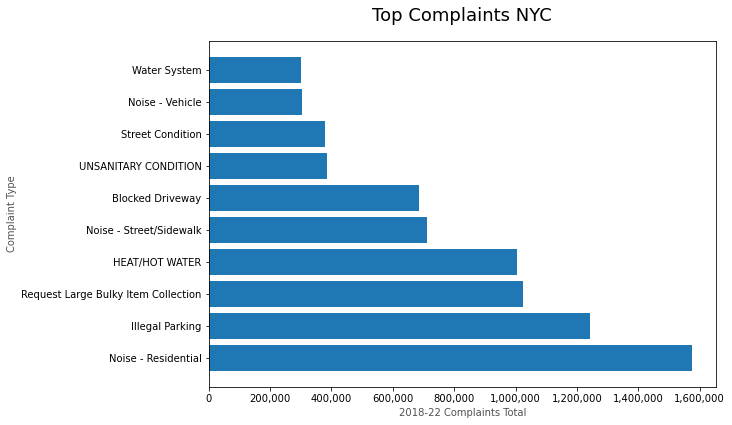

In [35]:
# horizontal plot of top complaints.
hor_plot(top_complaint_nyc,'Top Complaints NYC','Complaint Type','2018-22 Complaints Total')

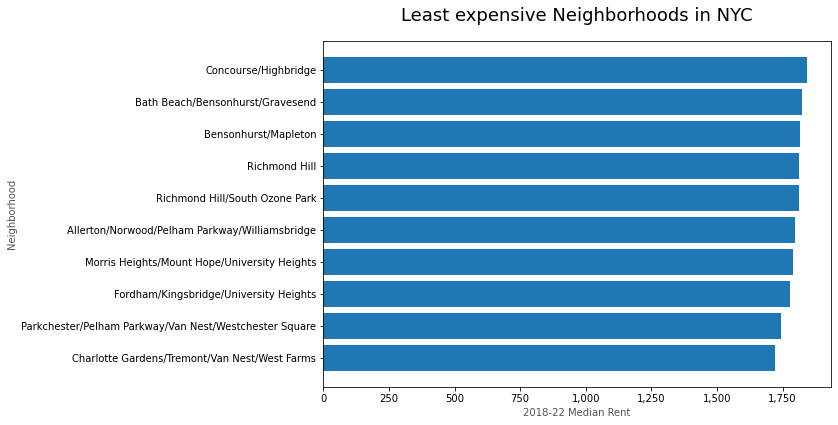

In [36]:
least_exp_nyc=df_final.groupby(['Neighborhood'])[['Median Rent']].mean().sort_values('Median Rent',ascending=False).tail(10)
least_exp_nyc = least_exp_nyc.rename(columns={"Median Rent": "Count"})
least_exp_nyc = least_exp_nyc.iloc[::-1]
# horizontal plots of priciest neighborhoods.
hor_plot(least_exp_nyc,'Least expensive Neighborhoods in NYC','Neighborhood','2018-22 Median Rent')

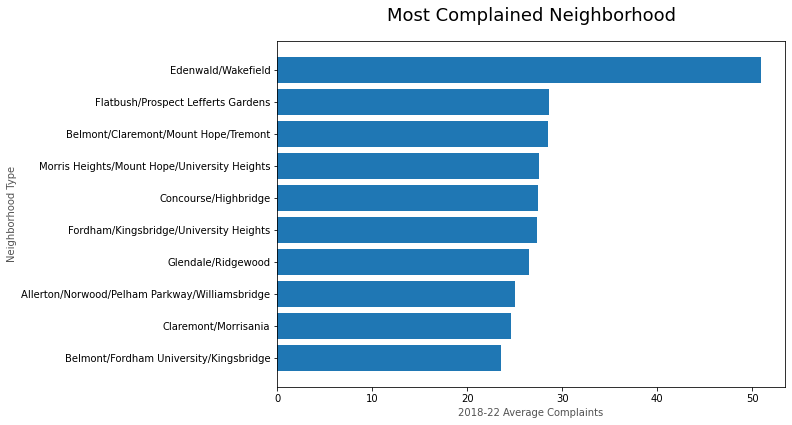

In [37]:
# horizontal plot of least complaint neighborhoods.
most_complaint_nb=df_final.groupby(['Neighborhood'])[['Count']].mean().sort_values('Count', ascending=True).tail(10)
hor_plot(most_complaint_nb,'Most Complained Neighborhood','Neighborhood Type','2018-22 Average Complaints')

In [38]:
# prepare data for priciest neighborhoods.
priciest_nyc=df_final.groupby(['Neighborhood'])[['Median Rent']].mean().sort_values('Median Rent',ascending=False).head(10)
priciest_nyc = priciest_nyc.rename(columns={"Median Rent": "Count"})
priciest_nyc = priciest_nyc.iloc[::-1]

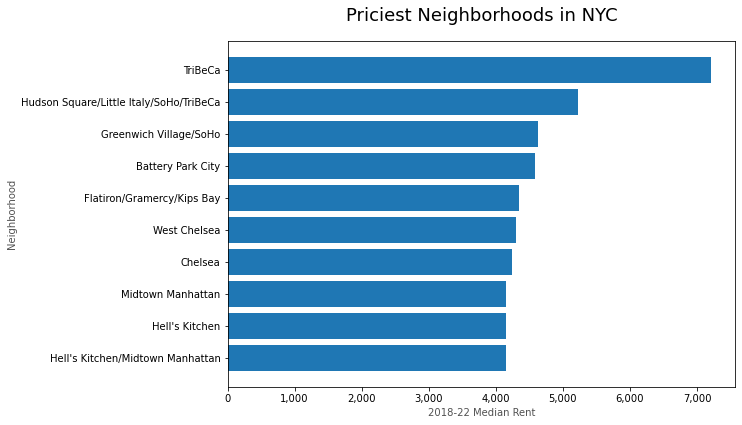

In [39]:
# horizontal plots of priciest neighborhoods.
hor_plot(priciest_nyc,'Priciest Neighborhoods in NYC','Neighborhood','2018-22 Median Rent')

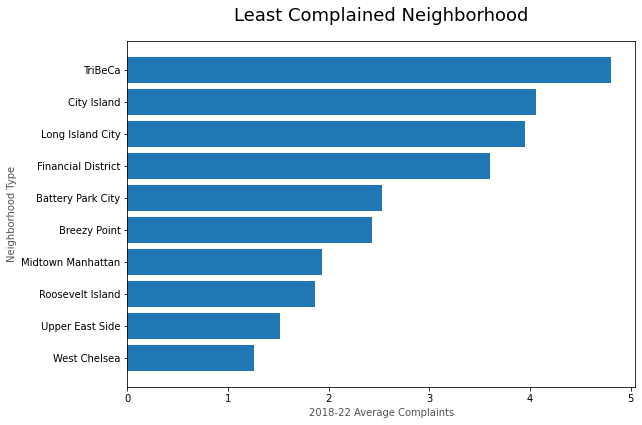

In [40]:
# horizontal plot of least complaint neighborhoods.
least_complaint_nb=df_final.groupby(['Neighborhood'])[['Count']].mean().sort_values('Count', ascending=True).head(10)
hor_plot(least_complaint_nb,'Least Complained Neighborhood','Neighborhood Type','2018-22 Average Complaints')

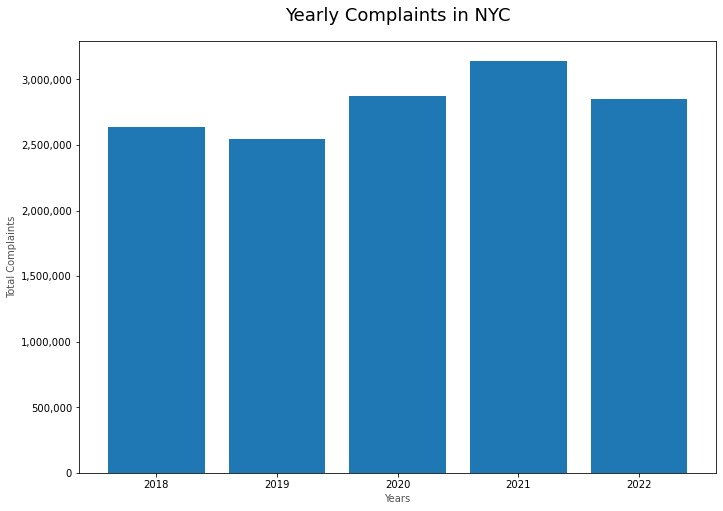

In [41]:
# total complaints by year.
year_complaint_nyc=df_final.groupby(['year'])[['Count']].sum()
vert_plot(year_complaint_nyc,'Yearly Complaints in NYC','Total Complaints','Years')

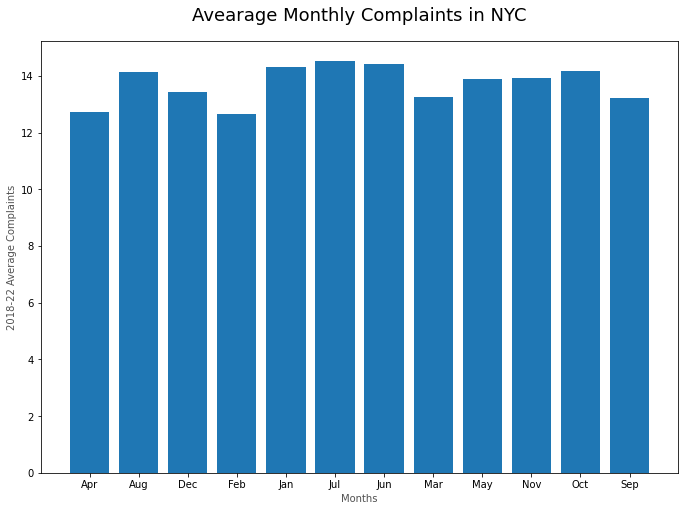

In [42]:
# average complaints by month.
month_complaint_nyc=df_final.groupby(['month'])[['Count']].mean()
vert_plot(month_complaint_nyc,'Avearage Monthly Complaints in NYC','2018-22 Average Complaints','Months')

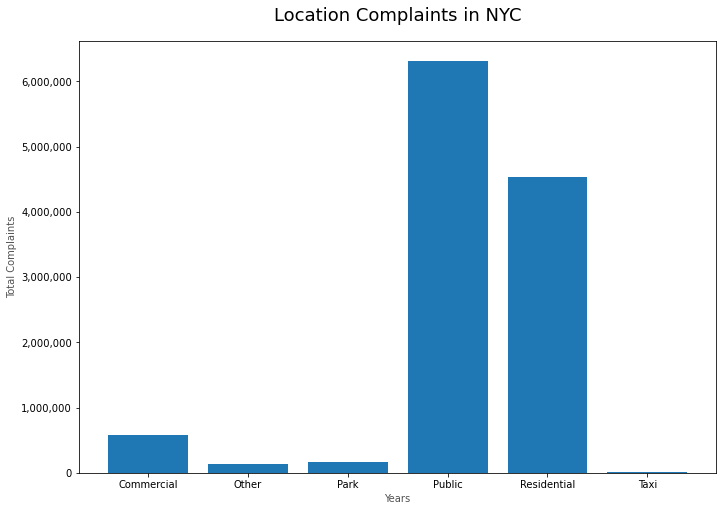

In [43]:
# total number of location complaints in NYC.
loc_complaint_nyc=df_final.groupby(['mapping'])[['Count']].sum()
vert_plot(loc_complaint_nyc,'Location Complaints in NYC','Total Complaints','Years')

In [44]:
# type of complaints & counts by borough.
df_pivot_comp_loc_bor = df_final.pivot_table(index = 'mapping', columns = 'Borough', values ='Count', aggfunc='mean')
df_pivot_comp_loc_bor.reset_index(inplace=True)
df_pivot_comp_loc_bor

Borough,mapping,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Commercial,5.239223,6.503614,6.813591,4.812272,3.959128
1,Other,2.178928,2.973825,7.071890,4.172213,2.778977
2,Park,5.282683,5.756221,5.213961,4.005409,3.058539
3,Public,17.893635,21.597323,11.992862,16.304109,16.191050
4,Residential,39.023971,20.901273,17.155295,10.649408,8.122001
5,Taxi,1.108696,1.530806,7.509804,4.044248,1.000000


<AxesSubplot:xlabel='mapping'>

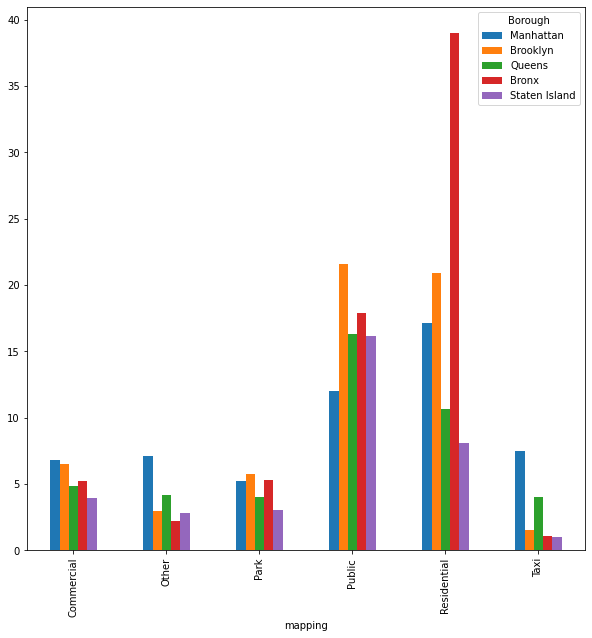

In [45]:
# bar plot by borough.
df_pivot_comp_loc_bor.plot(x="mapping", y=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'],
        kind="bar", figsize=(10, 10))

In [46]:
# create 2018 df.
filter_date_start = pd.to_datetime('2018-01-01')
filter_date_end = pd.to_datetime('2018-12-31')
df_2018 = df_final[df_final['Created Date'] <= filter_date_end]
# top complaints.
top_complaint_nyc_2018=df_2018.groupby(['Complaint Type'])[['Count']].sum().sort_values('Count',ascending=False).head(10)

In [47]:
# create 2019 df.
filter_date_start_2019 = pd.to_datetime('2019-01-01')
filter_date_end_2019 = pd.to_datetime('2019-12-31')
df_2019 = df_final[df_final['Created Date'] >= filter_date_start_2019]
df_2019 = df_2019[df_2019['Created Date'] <= filter_date_end_2019]
# top complaints.
top_complaint_nyc_2019=df_2019.groupby(['Complaint Type'])[['Count']].sum().sort_values('Count',ascending=False).head(10)

In [48]:
# create 2020 df.
filter_date_start_2020 = pd.to_datetime('2020-01-01')
filter_date_end_2020 = pd.to_datetime('2020-12-31')
df_2020 = df_final[df_final['Created Date'] >= filter_date_start_2020]
df_2020 = df_2020[df_2020['Created Date'] <= filter_date_end_2020]
# top complaints.
top_complaint_nyc_2020=df_2020.groupby(['Complaint Type'])[['Count']].sum().sort_values('Count',ascending=False).head(10)

In [49]:
# create 2021 df.
filter_date_start_2021 = pd.to_datetime('2021-01-01')
filter_date_end_2021 = pd.to_datetime('2021-12-31')
df_2021 = df_final[df_final['Created Date'] >= filter_date_start_2021 ]
df_2021 = df_2021[df_2021['Created Date'] <= filter_date_end_2021 ]
# top complaints.
top_complaint_nyc_2021=df_2021.groupby(['Complaint Type'])[['Count']].sum().sort_values('Count',ascending=False).head(10)

In [50]:
# create 2022 df.
filter_date_start_2022 = pd.to_datetime('2022-01-01')
filter_date_end_2022 = pd.to_datetime('2022-12-31')
df_2022 = df_final[df_final['Created Date'] >= filter_date_start_2022 ]
df_2022 = df_2022[df_2022['Created Date'] <= filter_date_end_2022 ]
# top complaints.
top_complaint_nyc_2022=df_2022.groupby(['Complaint Type'])[['Count']].sum().sort_values('Count',ascending=False).head(10)

In [51]:
from IPython.core.display import display, HTML
# create a function to display analysis side-by-side.
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

/var/folders/ft/gx6q37cs4x97wkdnqyhznp7r0000gn/T/ipykernel_4495/2734366107.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [52]:
# display top complaint types by year.
display_side_by_side([top_complaint_nyc_2019, top_complaint_nyc_2020, top_complaint_nyc_2022], ['2019 Top Comp', '2020 Top Comp', '2021 Top Comp'])

,Count
Complaint Type,
Noise - Residential,232648
Request Large Bulky Item Collection,214386
HEAT/HOT WATER,212455
Illegal Parking,197645
Blocked Driveway,137587
Noise - Street/Sidewalk,97749
Street Condition,86192
Water System,62973
UNSANITARY CONDITION,57806


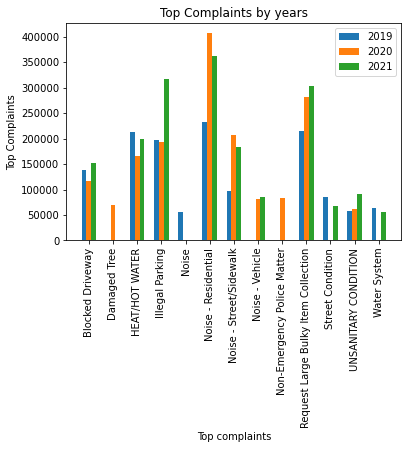

In [53]:
# plot top complaints by year.
comp_int=top_complaint_nyc_2019.join(top_complaint_nyc_2020, lsuffix="_2019", rsuffix="_2020", how='outer')
comp_final = comp_int.join(top_complaint_nyc_2021, rsuffix="_2021", how='outer')
X = list(comp_final.index)
X_axis = np.arange(len(X))
# create plot.
plt.bar(X_axis-0.2, comp_final['Count_2019'], 0.2, label = '2019')
plt.bar(X_axis, comp_final['Count_2020'], 0.2, label = '2020')
plt.bar(X_axis+0.2, comp_final['Count'], 0.2, label = '2021')
# set titles.
plt.xticks(X_axis, X,rotation = 90)
plt.xlabel("Top complaints")
plt.ylabel("Top Complaints")
plt.title("Top Complaints by years")
plt.legend()
plt.show()

### Visualize top complaints

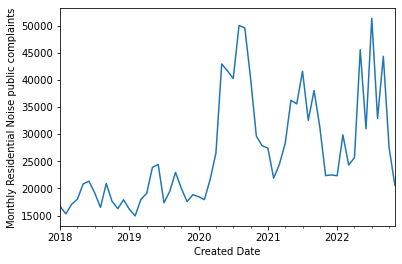

In [54]:
# plot Noise complaints over time (line graph).
noise_complaints = df_final[df_final['Complaint Type'] == 'Noise - Residential']
noise_complaints.set_index("Created Date", inplace = True)
monthly = noise_complaints.resample('M').sum()
monthly['Count'].plot()
plt.ylabel('Monthly Residential Noise public complaints');

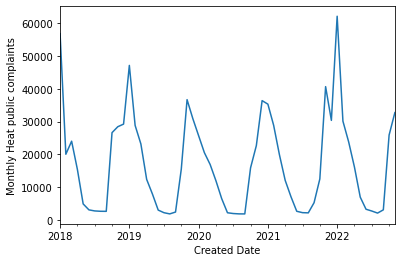

In [55]:
# plot Heat complaints over time (line graph).
heat_complaints = df_final[df_final['Complaint Type'] == 'HEAT/HOT WATER']
heat_complaints.set_index("Created Date", inplace = True)
monthly_heat = heat_complaints.resample('M').sum()
monthly_heat['Count'].plot()
plt.ylabel('Monthly Heat public complaints');

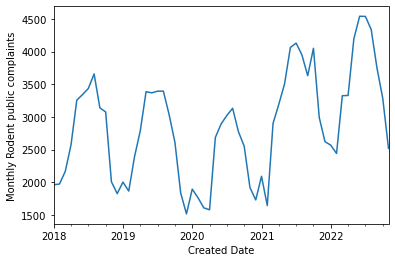

In [56]:
# plot Rodent complaints over time (line graph).
rodent_complaints = df_final[df_final['Complaint Type'] == 'Rodent']
rodent_complaints.set_index("Created Date", inplace = True)
monthly_rodent = rodent_complaints.resample('M').sum()
monthly_rodent['Count'].plot()
plt.ylabel('Monthly Rodent public complaints');

In [57]:
# rodent complaints.
rodent_complaint=rodent_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
rodent_complaints['Population estimate'] = rodent_complaints['Population estimate'].astype(float)
pop_average=rodent_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Population estimate']].mean()

/var/folders/ft/gx6q37cs4x97wkdnqyhznp7r0000gn/T/ipykernel_4495/3123185102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rodent_complaints['Population estimate'] = rodent_complaints['Population estimate'].astype(float)


In [58]:
# calculate Pearson Correlation for rodent complaints by population.
corr_data = rodent_complaint.join(pop_average)
num_complaints_list = corr_data['Count'].tolist()
pop_list = corr_data['Population estimate'].tolist()
pearson_corr = scipy.stats.pearsonr(num_complaints_list, pop_list)
print(pearson_corr)

(0.6499894909578174, 5.482980133670242e-23)


### Geoplots

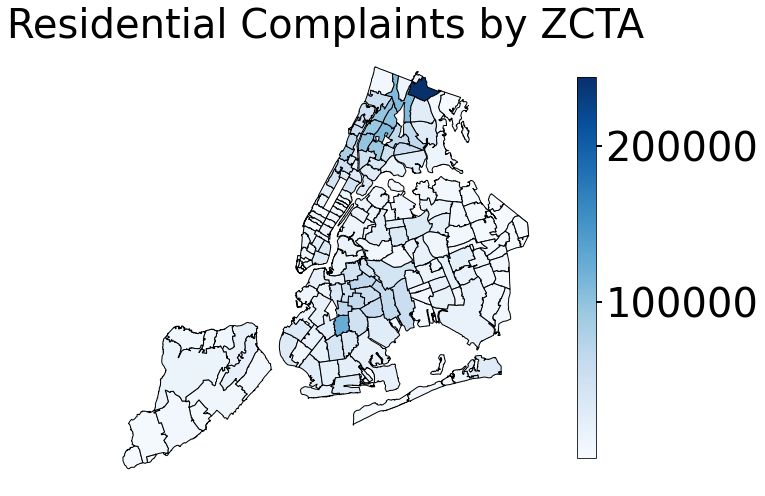

In [59]:
# plot residential complaints by zip-code tabulation area (ZCTA).
''' Residential complaints. '''
residential_complaints = df_final[df_final['mapping'] == 'Residential']
residential_complaint=residential_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(residential_complaint,'Residential')

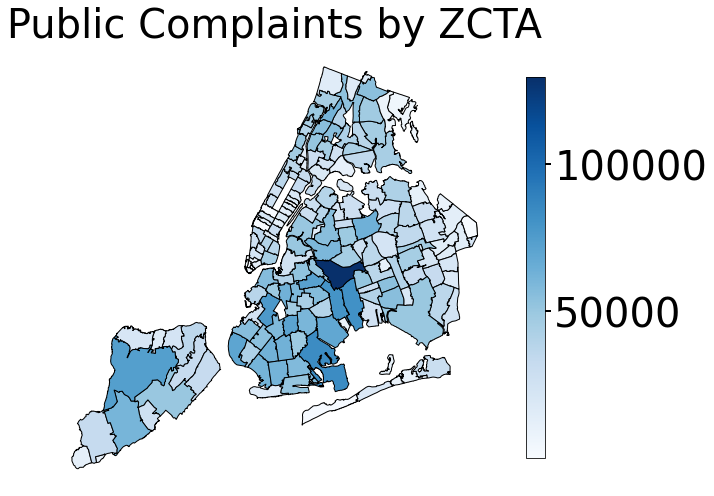

In [60]:
# plot public complaints by zip-code tabulation area (ZCTA).
''' Residential complaints. '''
public_complaints = df_final[df_final['mapping'] == 'Public']
public_complaint=public_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(public_complaint,'Public')

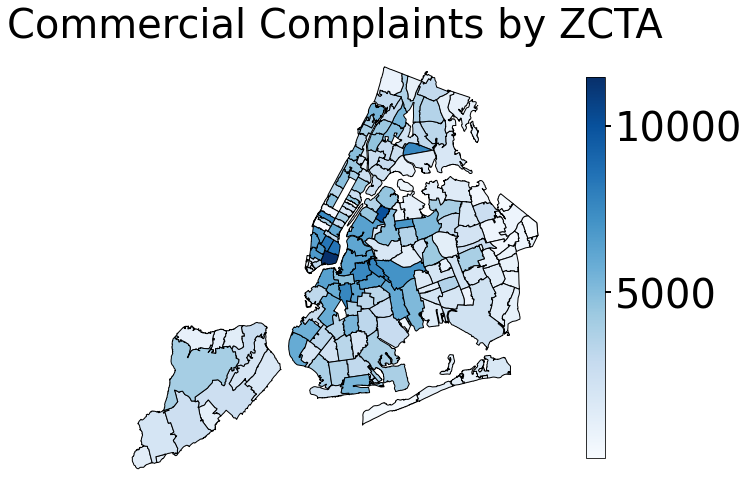

In [61]:
# plot public complaints by zip-code tabulation area (ZCTA).
''' Residential complaints. '''
commercial_complaints = df_final[df_final['mapping'] == 'Commercial']
commercial_complaint=commercial_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(commercial_complaint,'Commercial')

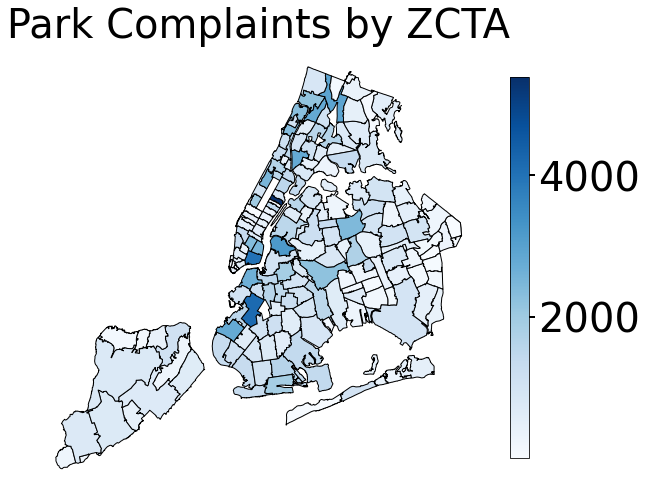

In [62]:
# plot park complaints by zip-code tabulation area (ZCTA).
''' Park complaints. '''
park_complaints = df_final[df_final['mapping'] == 'Park']
park_complaint=park_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(park_complaint,'Park')

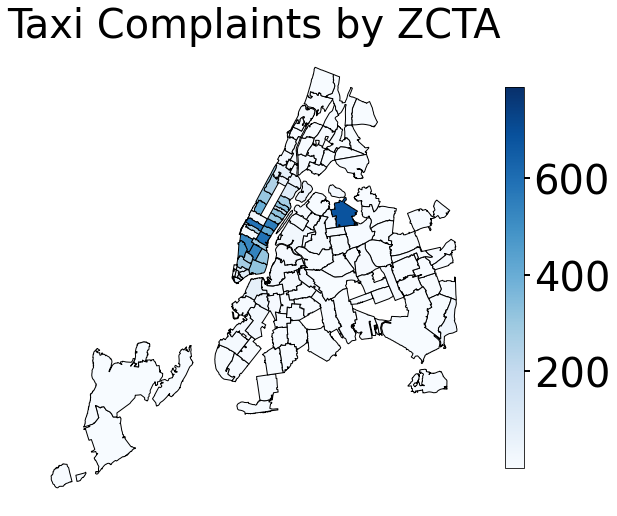

In [63]:
# plot taxi complaints by zip-code tabulation area (ZCTA).
''' Park complaints. '''
taxi_complaints = df_final[df_final['mapping'] == 'Taxi']
taxi_complaint=taxi_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(taxi_complaint,'Taxi')

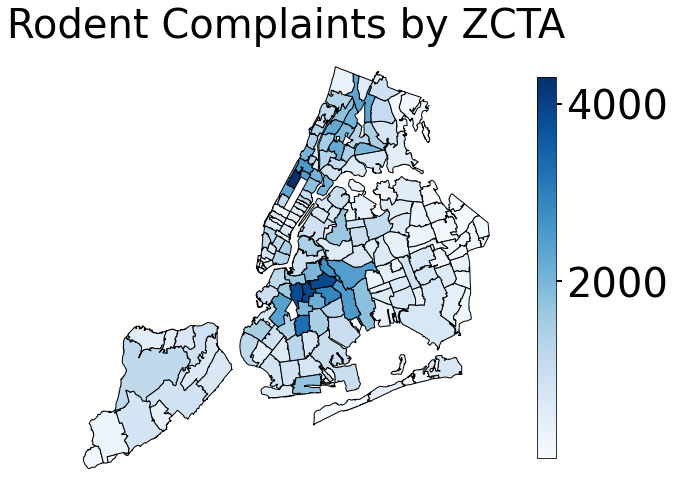

In [64]:
# plot rodent complaints by zip-code tabulation area (ZCTA).
''' Rodent Complaints. '''
rodent_complaints = df_final[df_final['Complaint Type'] == 'Rodent']
rodent_complaint=rodent_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(rodent_complaint,'Rodent')

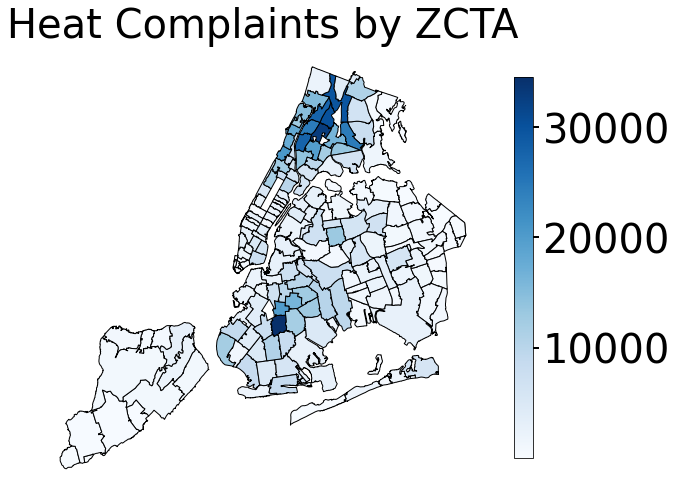

In [65]:
# plot heat complaints by zip-code tabulation area (ZCTA).
''' Heat Complaints. '''
heat_complaint = heat_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(heat_complaint,'Heat')

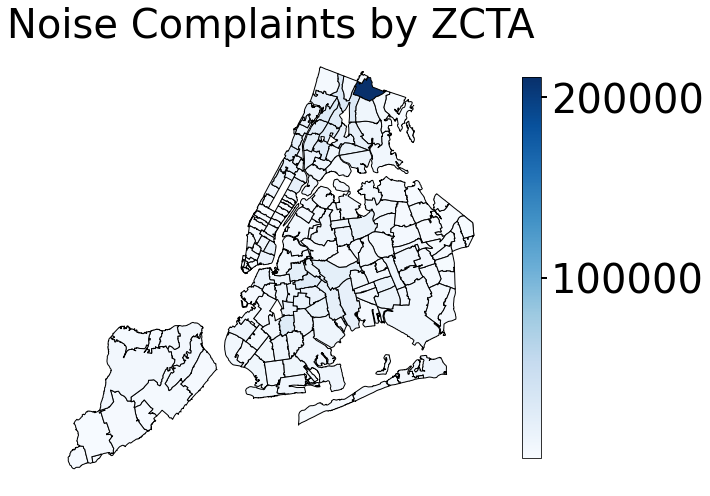

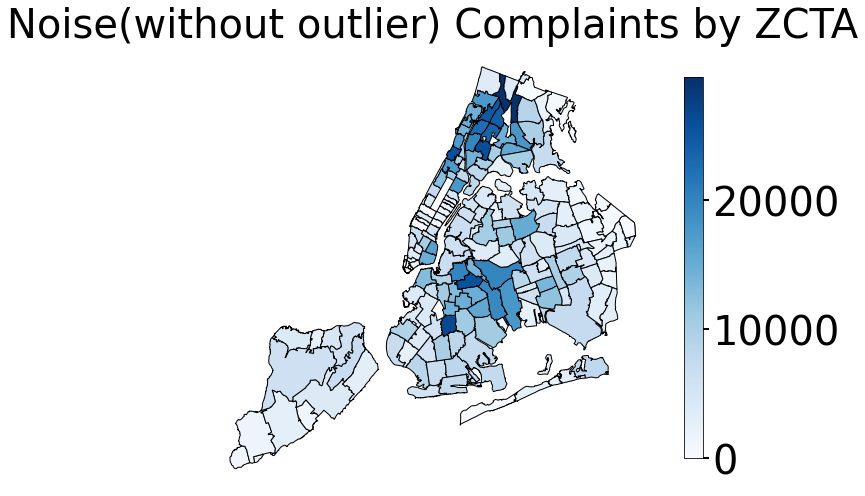

In [66]:
# plot noise complaints by zip-code tabulation area (ZCTA).
''' Noise Complaints. '''
noise_complaint = noise_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(noise_complaint,'Noise')
noise_complaint.loc[noise_complaint[noise_complaint['Count']==max(noise_complaint['Count'])].index]=0
nyc_map_plot(noise_complaint,'Noise(without outlier)')

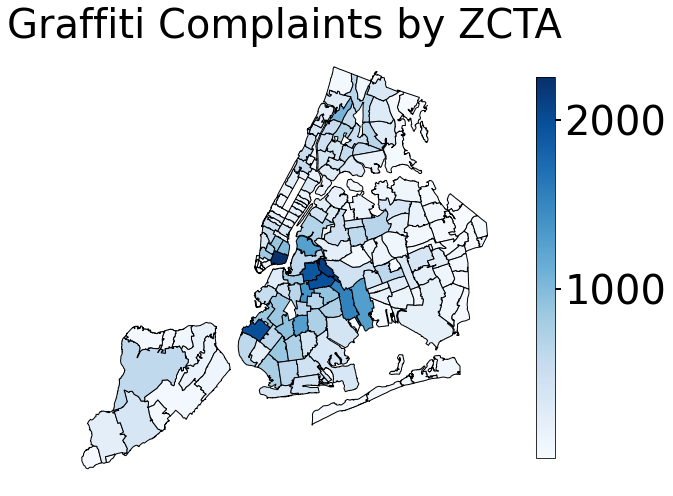

In [67]:
# plot graffiti complaints by zip-code tabulation area (ZCTA).
''' Graffiti Complaints. '''
graffiti_complaints = df_final[df_final['Complaint Type'] == 'Graffiti']
graffiti_complaint=graffiti_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(graffiti_complaint,'Graffiti')

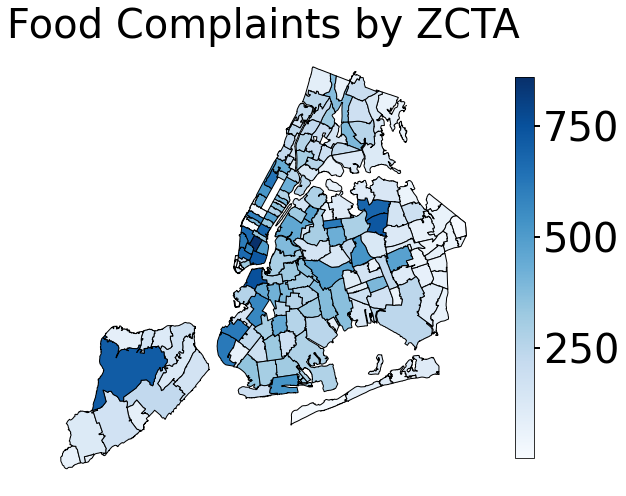

In [68]:
# plot food complaints by zip-code tabulation area (ZCTA).
'''Food Complaints'''
food_complaints = df_final[df_final['Complaint Type'] == 'Food Establishment']
food_complaint=food_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(food_complaint,'Food')

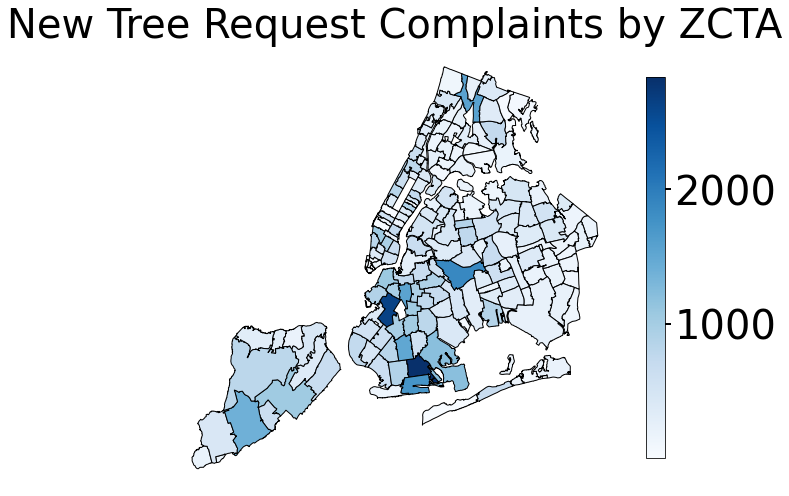

In [69]:
# plot new tree request complaints by zip-code tabulation area (ZCTA).
''' New Tree Request. '''
newtree_complaints = df_final[df_final['Complaint Type'] == 'New Tree Request']
newtree_complaint=newtree_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(newtree_complaint,'New Tree Request')

,,,Count
MODZCTA,Neighborhood,Borough,
10023.0,Lincoln Square,Manhattan,6508
10019.0,Hell's Kitchen,Manhattan,5304
10036.0,Hell's Kitchen/Midtown Manhattan,Manhattan,4101
10001.0,Chelsea,Manhattan,3739
10016.0,Kips Bay/Murray Hill/NoMad,Manhattan,3732
10003.0,East Village/Gramercy/Greenwich Village,Manhattan,3631
10011.0,Chelsea,Manhattan,3567
11377.0,Woodside,Queens,2611
10018.0,Hell's Kitchen/Midtown Manhattan,Manhattan,2253


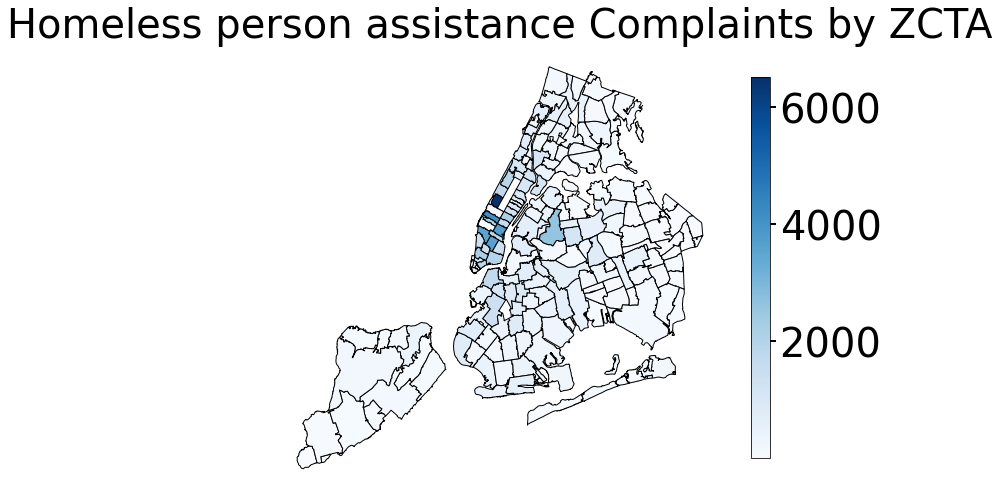

In [70]:
# plot homeless person assistance complaints by zip-code tabulation area (ZCTA).
''' Homeless Person Assistance. '''
homeless_complaints = df_final[df_final['Complaint Type'] == 'Homeless Person Assistance']
homeless_complaint=homeless_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(homeless_complaint,'Homeless person assistance')
homeless_complaint.sort_values('Count',ascending = False).head(10)

,,,Count
MODZCTA,Neighborhood,Borough,
10314.0,Bloomfield/Freshkills Park,Staten Island,4628
10465.0,Country Club/Throgs Neck,Bronx,4590
10469.0,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,4325
10461.0,Morris Park/Pelham Bay/Westchester Square,Bronx,4029
10473.0,Castle Hill/Clason Point/Soundview,Bronx,3644
10312.0,Annadale/Rossville,Staten Island,3214
10462.0,Parkchester/Pelham Parkway/Van Nest/Westchester Square,Bronx,3189
11207.0,Cypress Hills/East New York,Brooklyn,3046
11385.0,Glendale/Ridgewood,Queens,3029


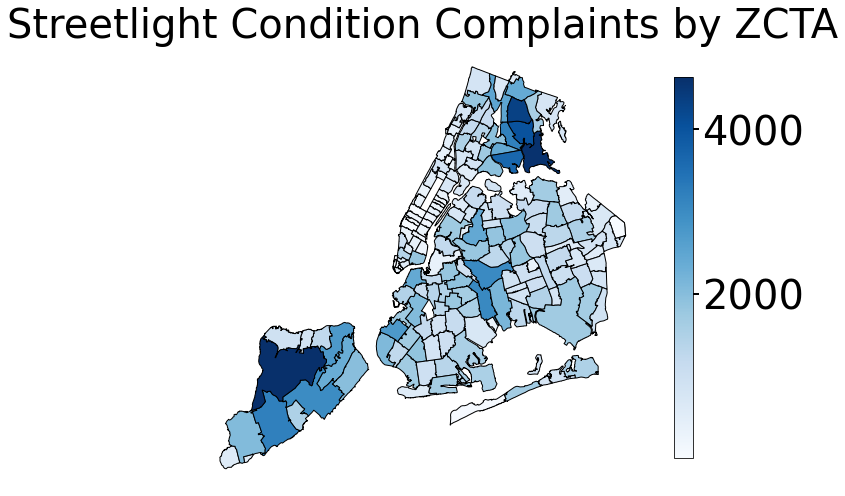

In [71]:
# plot street light condition complaints by zip-code tabulation area (ZCTA).
''' Street Light Complaints. '''
streetlight_complaints = df_final[df_final['Complaint Type'] == 'Street Light Condition']
streetlight_complaint=streetlight_complaints.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
nyc_map_plot(streetlight_complaint,'Streetlight Condition')
streetlight_complaint.sort_values('Count',ascending = False).head(10)

### COVID-19 time analysis

In [72]:
# AFTER Covid.
filter_date_covid = pd.to_datetime('2020-03-01')
filter_date_end_covid = pd.to_datetime('2021-03-31')
df_covid = df_final[df_final['Created Date'] >= filter_date_covid ]
# create df.
df_covid = df_covid[df_covid['Created Date'] <= filter_date_end_covid ]
display(df_covid.head())
top_complaint_nyc_covid=df_covid.groupby(['Complaint Type'])[['Count']].sum().sort_values('Count',ascending=False).head(10)

,Created Date,Complaint Type,Location Type,Incident Zip,TotalClosingTime,Count,Count_closed,Clean_zip,MODZCTA,Neighborhood,Borough,Population estimate,Median Rent,year,month,Season,mapping
458983,2020-03-01,APPLIANCE,RESIDENTIAL BUILDING,10001,601.0,8,8,10001,10001.0,Chelsea,Manhattan,23072.0,4200.0,2020,Mar,Spring,Residential
458984,2020-03-01,APPLIANCE,RESIDENTIAL BUILDING,10002,134.0,1,1,10002,10002.0,Chinatown/Lower East Side,Manhattan,74993.0,3610.0,2020,Mar,Spring,Residential
458985,2020-03-01,APPLIANCE,RESIDENTIAL BUILDING,10009,708.0,9,9,10009,10009.0,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,57925.0,3553.0,2020,Mar,Spring,Residential
458986,2020-03-01,APPLIANCE,RESIDENTIAL BUILDING,10010,60.0,1,1,10010,10010.0,Flatiron/Gramercy/Kips Bay,Manhattan,33730.0,4367.5,2020,Mar,Spring,Residential
458987,2020-03-01,APPLIANCE,RESIDENTIAL BUILDING,10011,137.0,3,3,10011,10011.0,Chelsea,Manhattan,50472.0,4200.0,2020,Mar,Spring,Residential


In [73]:
# BEFORE Covid.
filter_date_precovid = pd.to_datetime('2019-03-01')
filter_date_end_precovid = pd.to_datetime('2020-03-31')
df_precovid = df_final[df_final['Created Date'] >= filter_date_precovid ]
# create df.
df_precovid = df_precovid[df_precovid['Created Date'] <= filter_date_end_precovid ]
display(df_precovid.head())
top_complaint_nyc_precovid=df_precovid.groupby(['Complaint Type'])[['Count']].sum().sort_values('Count',ascending=False).head(10)

,Created Date,Complaint Type,Location Type,Incident Zip,TotalClosingTime,Count,Count_closed,Clean_zip,MODZCTA,Neighborhood,Borough,Population estimate,Median Rent,year,month,Season,mapping
245585,2019-03-01,APPLIANCE,RESIDENTIAL BUILDING,10001,14.0,2,2,10001,10001.0,Chelsea,Manhattan,23072.0,4150.0,2019,Mar,Spring,Residential
245586,2019-03-01,APPLIANCE,RESIDENTIAL BUILDING,10002,86.0,9,9,10002,10002.0,Chinatown/Lower East Side,Manhattan,74993.0,2906.5,2019,Mar,Spring,Residential
245587,2019-03-01,APPLIANCE,RESIDENTIAL BUILDING,10003,33.0,4,4,10003,10003.0,East Village/Gramercy/Greenwich Village,Manhattan,54682.0,3590.0,2019,Mar,Spring,Residential
245588,2019-03-01,APPLIANCE,RESIDENTIAL BUILDING,10009,23.0,4,4,10009,10009.0,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,57925.0,3425.0,2019,Mar,Spring,Residential
245589,2019-03-01,APPLIANCE,RESIDENTIAL BUILDING,10010,29.0,4,4,10010,10010.0,Flatiron/Gramercy/Kips Bay,Manhattan,33730.0,4299.0,2019,Mar,Spring,Residential


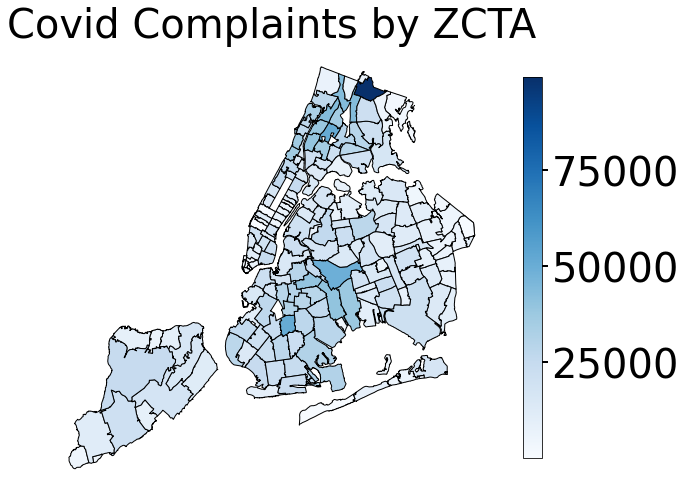

In [74]:
''' AFTER Covid-19. '''
covid_complaint=df_covid.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
# plot.
nyc_map_plot(covid_complaint,'Covid')

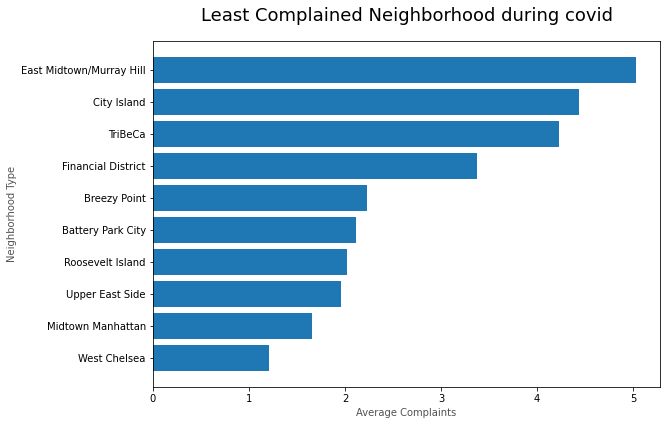

In [75]:
# horizontal plot of least complaint neighborhoods covid.
least_complaint_nb_covid=df_covid.groupby(['Neighborhood'])[['Count']].mean().sort_values('Count', ascending=True).head(10)
hor_plot(least_complaint_nb_covid,'Least Complained Neighborhood during covid','Neighborhood Type','Average Complaints')

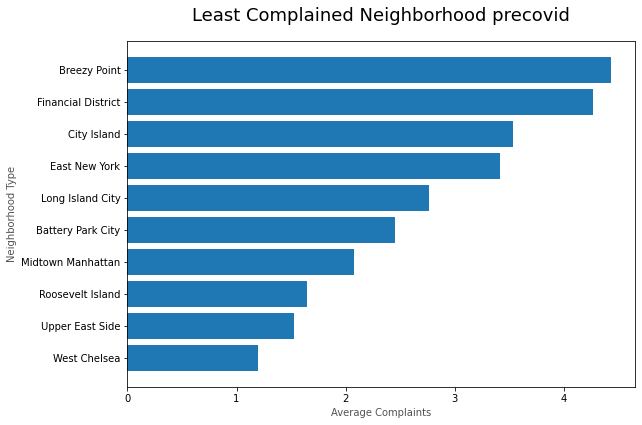

In [76]:
# horizontal plot of least complaint neighborhoods pre covid
least_complaint_nb_precovid=df_precovid.groupby(['Neighborhood'])[['Count']].mean().sort_values('Count', ascending=True).head(10)
hor_plot(least_complaint_nb_precovid,'Least Complained Neighborhood precovid','Neighborhood Type','Average Complaints')

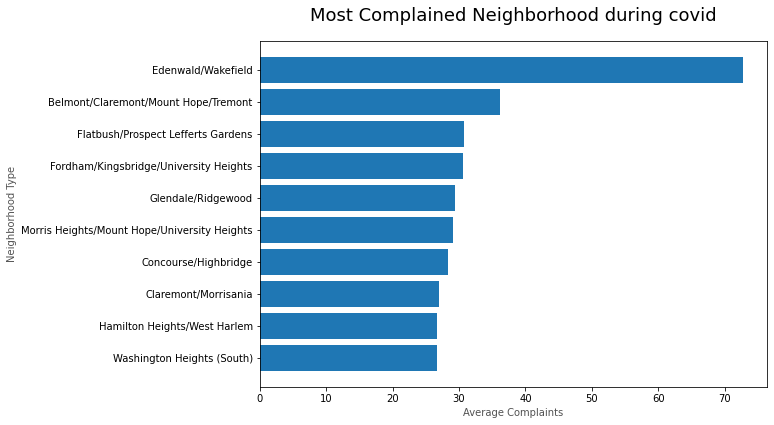

In [77]:
# horizontal plot of most complaint neighborhoods covid
most_complaint_nb_covid=df_covid.groupby(['Neighborhood'])[['Count']].mean().sort_values('Count', ascending=True).tail(10)
hor_plot(most_complaint_nb_covid,'Most Complained Neighborhood during covid','Neighborhood Type','Average Complaints')

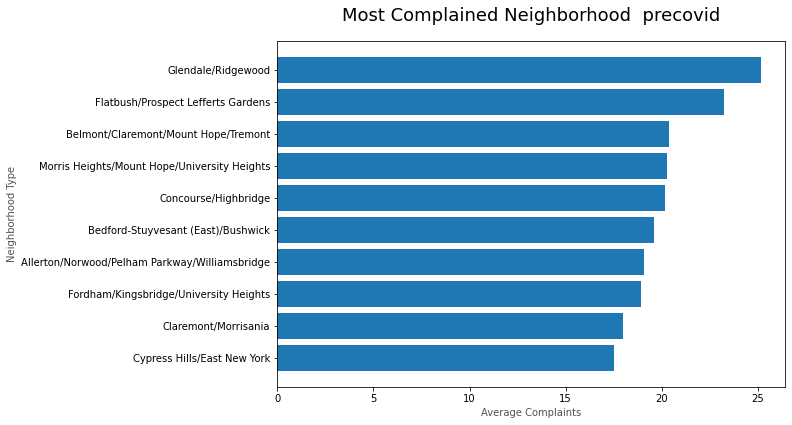

In [78]:
# horizontal plot of most complaint neighborhoods precovid
most_complaint_nb_precovid=df_precovid.groupby(['Neighborhood'])[['Count']].mean().sort_values('Count', ascending=True).tail(10)
hor_plot(most_complaint_nb_precovid,'Most Complained Neighborhood  precovid','Neighborhood Type','Average Complaints')

In [79]:
# finding complaints count by covid and pre covid times
complaints_covid=df_covid.groupby(['Complaint Type'])[['Count']].mean()
complaints_precovid = df_precovid.groupby(['Complaint Type'])[['Count']].mean()
complaints_comp = complaints_covid.join(complaints_precovid,lsuffix='Covid', rsuffix='precovid')
complaints_comp.fillna(0,inplace=True)

In [80]:
# find the % of increase from pre covid to covid
def categorise(row):  
    if row['Countprecovid'] == 0:
        return 1
    else:
        return (row['CountCovid']-row['Countprecovid'])/row['Countprecovid']
complaints_comp['Increase'] = complaints_comp.apply(lambda row: categorise(row), axis=1)

In [81]:
top_inc_covid = complaints_comp.sort_values('Increase',ascending=False).head(10) # top complaints with max increase

,CountCovid,Countprecovid,Increase
Complaint Type,,,
Illegal Fireworks,18.621764,1.950000,8.549622
X-Ray Machine/Equipment,7.000000,1.000000,6.000000
Snow Removal,8.401294,1.505051,4.582068
COVID-19 Non-essential Construction,5.356765,1.000000,4.356765
Non-Emergency Police Matter,12.197100,2.712444,3.496720
Damaged Tree,29.964606,7.120769,3.208058
Snow,11.567751,3.306785,2.498187
Noise - Helicopter,16.781668,6.786885,1.472661
Home Delivered Meal - Missed Delivery,3.170792,1.373626,1.308337


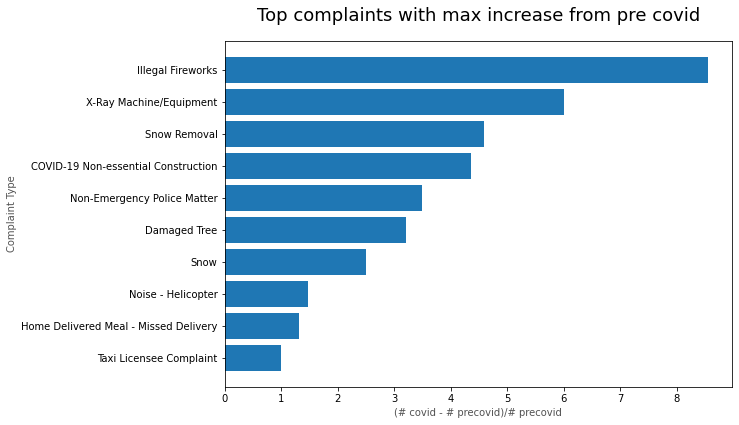

In [82]:
display(top_inc_covid) # top complaints with max increase displayed
top_inc_covid = top_inc_covid.rename(columns={"Increase": "Count"})
top_inc_covid = top_inc_covid.iloc[::-1]
hor_plot(top_inc_covid,'Top complaints with max increase from pre covid','Complaint Type','(# covid - # precovid)/# precovid')

,CountCovid,Countprecovid,Increase
Complaint Type,,,
Highway Condition,1.000000,2.160075,-0.537053
Graffiti,1.854018,4.438634,-0.582300
Lost Property,2.953079,7.536272,-0.608151
Taxi Complaint,2.245161,5.747904,-0.609395
DEP Street Condition,1.025641,2.858407,-0.641184
For Hire Vehicle Complaint,3.383995,10.041916,-0.663013
Homeless Encampment,1.000000,2.973264,-0.663669
Borough Office,1.000000,5.254717,-0.809695
Panhandling,1.308682,7.317734,-0.821163


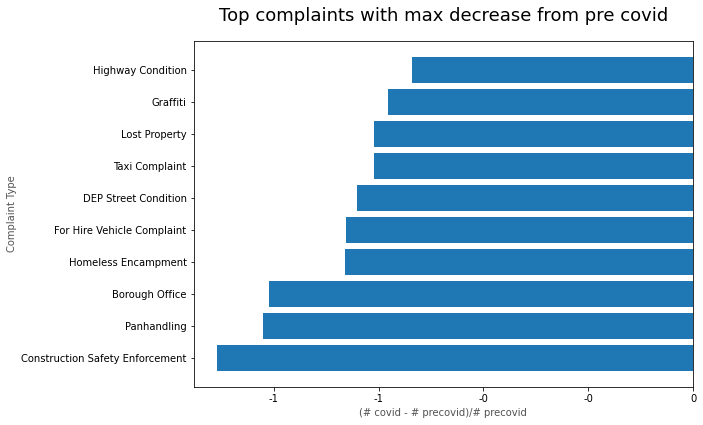

In [83]:
bottom_inc_covid = complaints_comp.sort_values('Increase',ascending=False).tail(10) # top complaints with maximum decrease
display(bottom_inc_covid) # top complaints with max decrease
bottom_inc_covid = bottom_inc_covid.rename(columns={"Increase": "Count"})
bottom_inc_covid = bottom_inc_covid.iloc[::-1]
hor_plot(bottom_inc_covid,'Top complaints with max decrease from pre covid','Complaint Type','(# covid - # precovid)/# precovid')

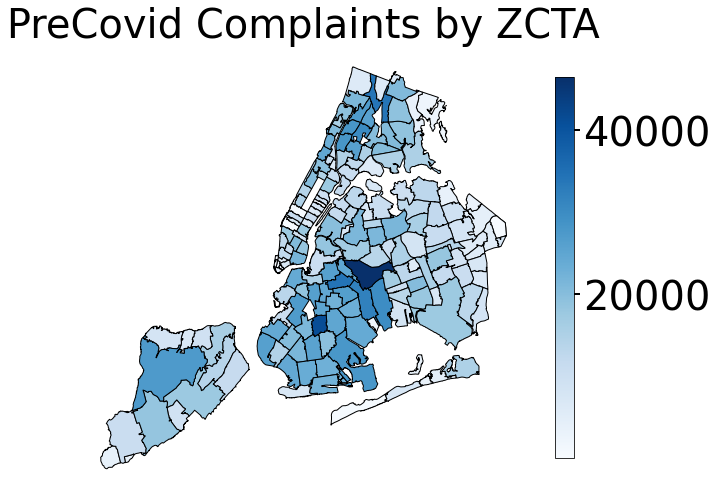

In [84]:
''' BEFORE Covid-19. '''
precovid_complaint=df_precovid.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].sum()
# plot.
nyc_map_plot(precovid_complaint,'PreCovid')

In [85]:
# view top complaints BEFORE Covid.
top_complaint_nyc_precovid.index

Index(['Noise - Residential', 'Request Large Bulky Item Collection',
       'Illegal Parking', 'HEAT/HOT WATER', 'Blocked Driveway',
       'Noise - Street/Sidewalk', 'Street Condition', 'Water System', 'Noise',
       'UNSANITARY CONDITION'],
      dtype='object', name='Complaint Type')

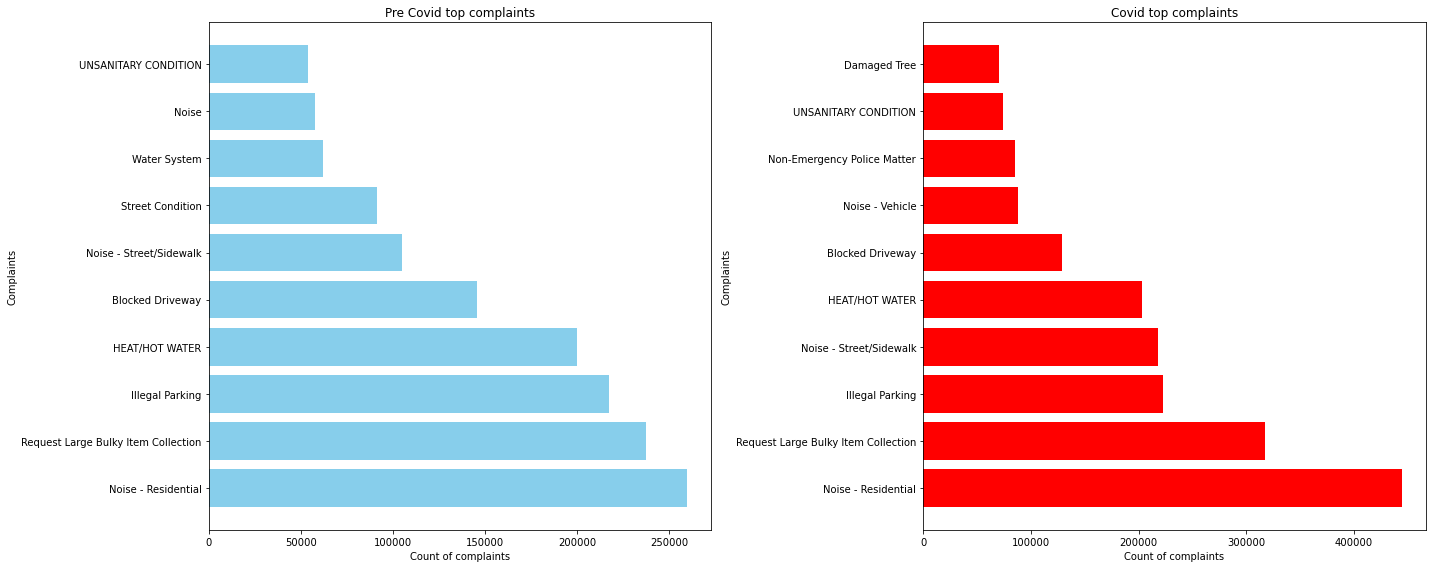

In [86]:
# plot PRE / POST Covid-19 bar graphs.
f3, axes3 = plt.subplots(nrows=1, ncols=2)  # declaring the figure and axis.
f3.set_size_inches(20, 8)  # set the figure size.
# build plot.
axes3[0].barh(top_complaint_nyc_precovid.index,top_complaint_nyc_precovid['Count'],align='center', color ='skyblue') 
axes3[1].barh(top_complaint_nyc_covid.index,top_complaint_nyc_covid['Count'],align='center', color ='red') 
# titles.
axes3[0].set(title = 'Pre Covid top complaints', xlabel = 'Count of complaints', ylabel = 'Complaints')
axes3[1].set(title = 'Covid top complaints', xlabel = 'Count of complaints', ylabel = 'Complaints')
# layout.
f3.tight_layout()  # have a tight layout of the figure to ensure no overlap.
plt.show()  # display the plot.

### Analysis by boroughs

In [87]:
# create function to build pie charts.
def comp_bor_plot(sub_df):
    comp_bor=sub_df.groupby(['Borough'])[['Count']].sum()
    comp_bor.plot.pie(y='Count', figsize=(10, 10))

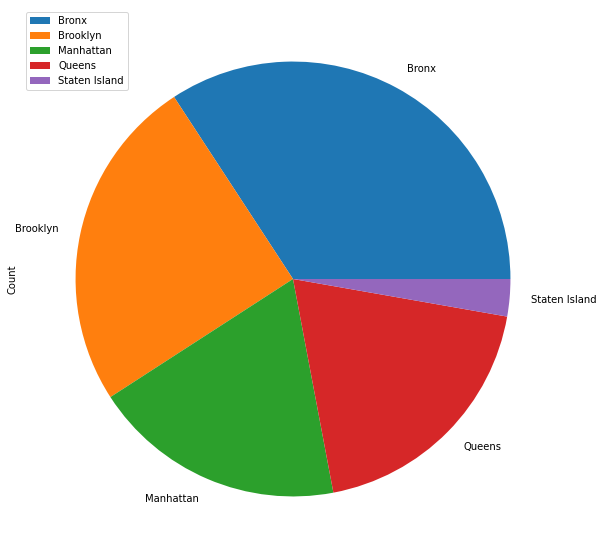

In [88]:
# plot Noise complaints (pie chart).
comp_bor_plot(noise_complaints)

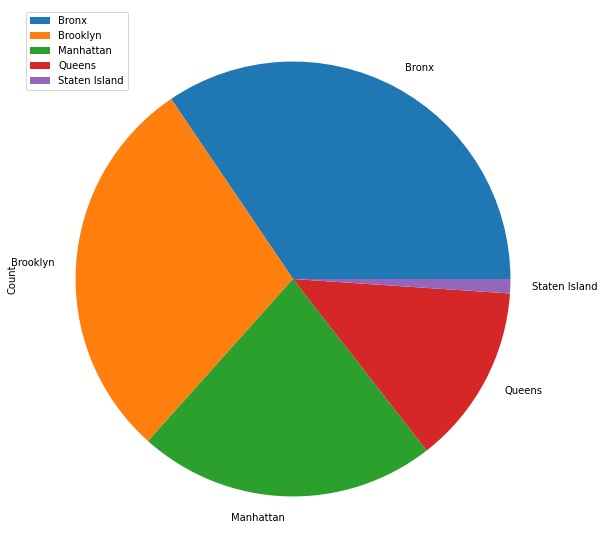

In [89]:
# plot Heat complaints (pie chart).
comp_bor_plot(heat_complaints)

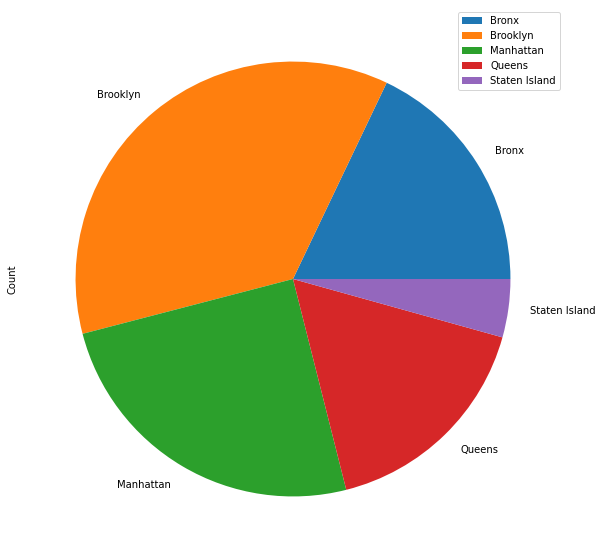

In [90]:
# plot Rodent complaints (pie chart).
comp_bor_plot(rodent_complaints)

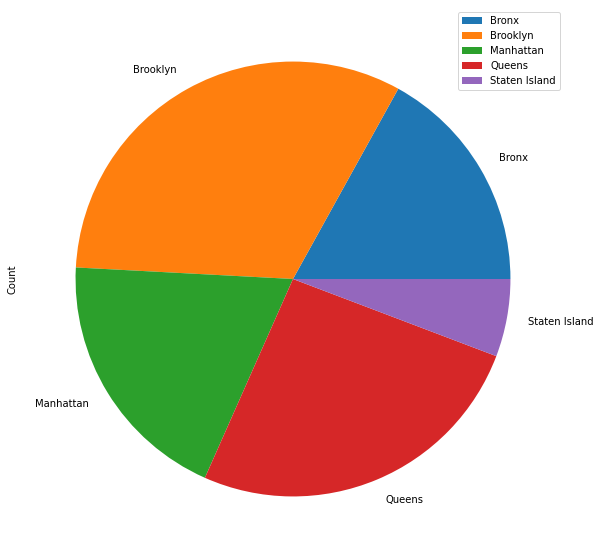

In [91]:
# plot PRE-COVID complaints (pie chart).
comp_bor_plot(df_precovid)

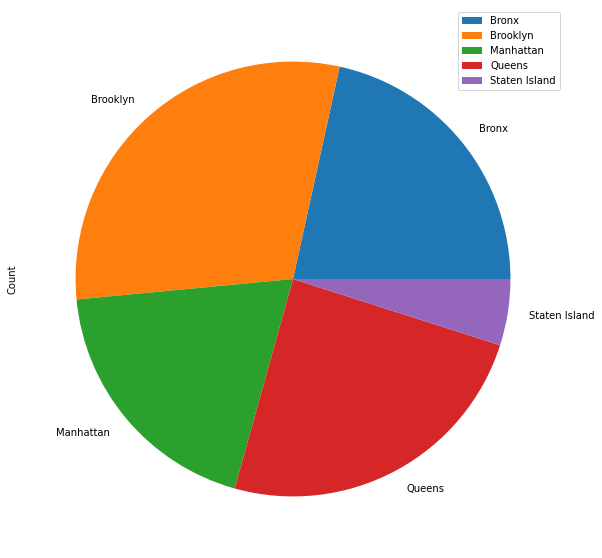

In [92]:
# plot POST-COVID complaints (pie chart).
comp_bor_plot(df_covid)

### Scatter plots

In [93]:
# create function to build scatter plots.
def scatter_plot_zip(scat_df):
    avg_comp=scat_df.groupby(['Borough'])[['Count']].mean()
    avg_rent=scat_df.groupby(['Borough'])[['Median Rent']].median()
    scat_comb = avg_comp.join(avg_rent)
    scat_comb.reset_index(inplace=True)
    df1 = scat_comb[scat_comb['Borough']=='Manhattan']
    df2 = scat_comb[scat_comb['Borough']=='Brooklyn']
    df3 = scat_comb[scat_comb['Borough']=='Queens']
    df4 = scat_comb[scat_comb['Borough']=='Bronx']
    df5 = scat_comb[scat_comb['Borough']=='Staten Island']
    ax = df1.plot(x='Count', y='Median Rent', kind='scatter', c='r', label='Manhattan')
    df2.plot(x='Count', y='Median Rent', kind='scatter', ax=ax, c='g', label='Brooklyn')
    df3.plot(x='Count', y='Median Rent', kind='scatter', ax=ax, c='b', label='Queens')
    df4.plot(x='Count', y='Median Rent', kind='scatter', ax=ax, c='orange', label='Bronx')
    df5.plot(x='Count', y='Median Rent', kind='scatter', ax=ax, c='y', label='Staten Island')
    plt.show()

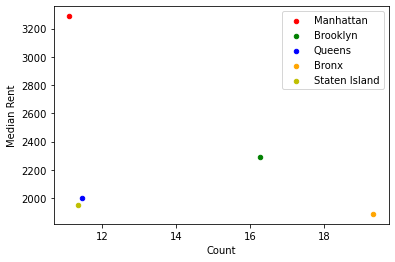

In [94]:
# plot Rent by borough (scatter plot).
scatter_plot_zip(df_final)

In [95]:
# create function to build scatter plots.
def scatter_plot_nb(scat_df):
    avg_comp=scat_df.groupby(['MODZCTA','Neighborhood','Borough'])[['Count']].mean()
    avg_rent=scat_df.groupby(['MODZCTA','Neighborhood','Borough'])[['Median Rent']].median()
    scat_comb = avg_comp.join(avg_rent)
    scat_comb.reset_index(inplace=True)
    df1 = scat_comb[scat_comb['Borough']=='Manhattan']
    df2 = scat_comb[scat_comb['Borough']=='Brooklyn']
    df3 = scat_comb[scat_comb['Borough']=='Queens']
    df4 = scat_comb[scat_comb['Borough']=='Bronx']
    df5 = scat_comb[scat_comb['Borough']=='Staten Island']
    ax = df1.plot(x='Count', y='Median Rent', kind='scatter', c='r', label='Manhattan')
    df2.plot(x='Count', y='Median Rent', kind='scatter', ax=ax, c='g', label='Brooklyn')
    df3.plot(x='Count', y='Median Rent', kind='scatter', ax=ax, c='b', label='Queens')
    df4.plot(x='Count', y='Median Rent', kind='scatter', ax=ax, c='orange', label='Bronx')
    df5.plot(x='Count', y='Median Rent', kind='scatter', ax=ax, c='y', label='Staten Island')
    plt.show()

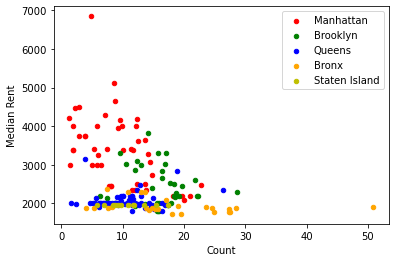

In [96]:
# plot Rent by borough (scatter plot).
scatter_plot_nb(df_final)

### Borough trends

In [97]:
# creating function for plotting borough level rent vs. count trend.
def bor_rentvscomp(bordf,boro):
    df_final_man = bordf[bordf['Borough']==boro]
    df_final_man.set_index("Created Date", inplace = True)
    monthly_man = df_final_man.resample('M').mean()
    monthly_man['Count'] = monthly_man['Count']/monthly_man['Count'].abs().max()
    monthly_man['Median Rent'] = monthly_man['Median Rent']/monthly_man['Median Rent'].abs().max()
    monthly_man['Count'].plot()
    monthly_man['Median Rent'].plot()
    plt.ylabel('{} Trends'.format(boro));
    plt.legend()

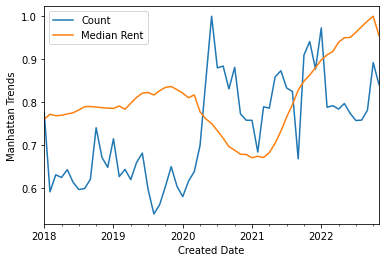

In [98]:
# plot median rent vs. count trends for Manhattan.
bor_rentvscomp(df_final,'Manhattan')

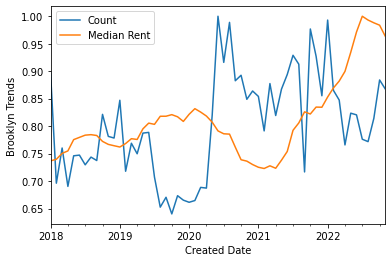

In [99]:
# plot median rent vs. count trends for Brooklyn.
bor_rentvscomp(df_final,'Brooklyn')

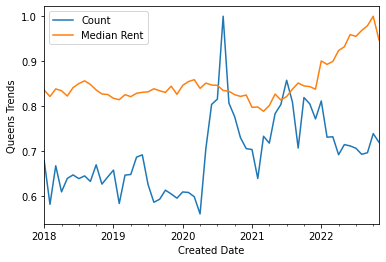

In [100]:
# plot median rent vs. count trends for Queens.
bor_rentvscomp(df_final,'Queens')

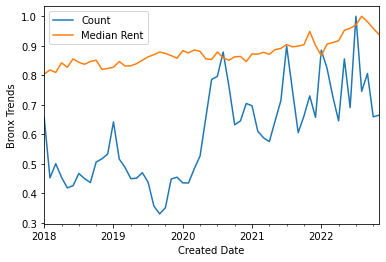

In [101]:
# plot median rent vs. count trends for Bronx.
bor_rentvscomp(df_final,'Bronx')

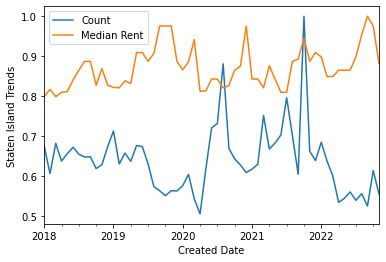

In [102]:
# plot median rent vs. count trends for Staten Island.
bor_rentvscomp(df_final,'Staten Island')

### Borough geoplot

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

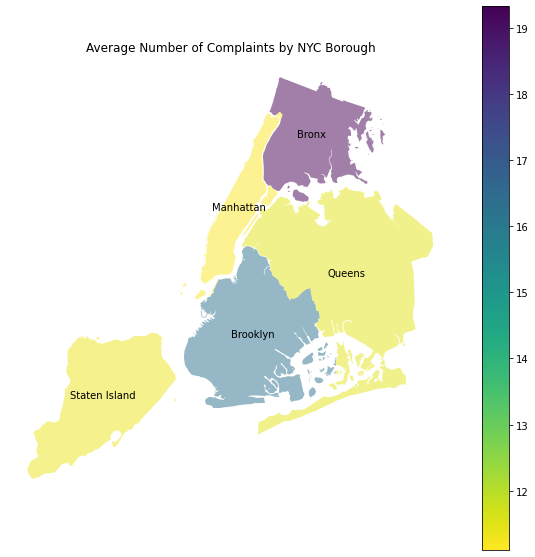

In [103]:
# graph count of complaints by borough.
nyc.rename(columns={'BoroName':'Borough'}, inplace=True)
borough_count = df_final.groupby(['Borough'])[['Count']].mean()
bc_geo = nyc.merge(borough_count, on='Borough')
# plot the count by borough into a map.
fig,ax = plt.subplots(1,1, figsize=(10,10))
bc_geo.plot(column='Count', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
bc_geo.apply(lambda x: ax.annotate(text=x.Borough, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Average Number of Complaints by NYC Borough")
plt.axis('off')

In [104]:
# create function to plot count by borough onto a map.
def nyc_bor_map(bor_df,df_type):
    nyc.rename(columns={'BoroName':'Borough'}, inplace=True)
    borough_count = bor_df.groupby(['Borough'])[['Count']].mean()
    bc_geo = nyc.merge(borough_count, on='Borough')
    # plot the count by borough into a map.
    fig,ax = plt.subplots(1,1, figsize=(10,10))
    bc_geo.plot(column='Count', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
    bc_geo.apply(lambda x: ax.annotate(text=x.Borough, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
    plt.title("{} by NYC Borough".format(df_type))
    plt.axis('off')

## Additional Statistics

In [105]:
# examine merged df.
print(df_final.head())
print(df_final.shape)
print(df_final.columns)

  Created Date Complaint Type         Location Type Incident Zip  \
0   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10002   
1   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10003   
2   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10009   
3   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10010   
4   2018-01-01      APPLIANCE  RESIDENTIAL BUILDING        10012   

   TotalClosingTime  Count  Count_closed  Clean_zip  MODZCTA  \
0              91.0      6             6      10002  10002.0   
1              75.0      4             4      10003  10003.0   
2              43.0      7             7      10009  10009.0   
3              82.0      2             2      10010  10010.0   
4              22.0      2             2      10012  10012.0   

                                        Neighborhood    Borough  \
0                          Chinatown/Lower East Side  Manhattan   
1            East Village/Gramercy/Greenwich Village  Manhattan   
2  Al

In [106]:
# look at statistics by YEAR.
data_year = df_final.groupby(df_final['Created Date'].map(lambda x: x.year))['Count'].sum() # ['Count'].sum()
print('by year: ')
print(data_year)  # number of complaints per year.
num_total = sum(data_year.tolist())
print(num_total)  # 10,145,054 total complaints from 2019-2022.

by year: 
Created Date
2018    2634379
2019    2546999
2020    2870510
2021    3137290
2022    2852666
Name: Count, dtype: int64
14041844


In [107]:
# averages by year.
data_year_avg = df_final.groupby(df_final['Created Date'].map(lambda x: x.year)).mean()
print(data_year_avg)

              TotalClosingTime      Count  Count_closed     Clean_zip  \
Created Date                                                            
2018                165.819884  12.392121     12.147400  10814.541078   
2019                167.724355  11.858862     11.547063  10813.913096   
2020                151.851280  14.598981     14.216632  10815.573847   
2021                119.231199  15.124426     14.594556  10811.131383   
2022                 75.722191  15.025894     14.017261  10807.562149   

                   MODZCTA  Population estimate  Median Rent    year  
Created Date                                                          
2018          10814.294282         53816.213976  2369.288605  2018.0  
2019          10813.653788         54031.795000  2438.989974  2019.0  
2020          10815.313832         53932.393151  2359.851826  2020.0  
2021          10810.871288         53924.578011  2378.162464  2021.0  
2022          10807.291609         53817.409918  2808.560306  

In [108]:
# averages by borough.
data_borough_avg = df_final.groupby(['Borough']).mean()
print(data_borough_avg)

               TotalClosingTime      Count  Count_closed     Clean_zip  \
Borough                                                                  
Bronx                156.799349  19.323481     18.926643  10462.458616   
Brooklyn             180.639309  16.270262     15.724936  11220.438787   
Manhattan            107.851477  11.106597     10.558584  10028.932203   
Queens               115.368180  11.454697     11.018959  11370.862035   
Staten Island        128.426066  11.345019     10.912817  10306.851698   

                    MODZCTA  Population estimate  Median Rent         year  
Borough                                                                     
Bronx          10462.458616         61868.291273  1941.302522  2019.948753  
Brooklyn       11219.575128         72867.924840  2472.378057  2019.945234  
Manhattan      10028.788029         43075.556420  3366.451575  2019.957588  
Queens         11370.861315         44473.978111  2089.885676  2019.942520  
Staten Island  1030

In [109]:
# averages by borough, year.
data_borough_year_avg = df_final.groupby(['Borough', df_final['Created Date'].map(lambda x: x.year)]).mean()
print(data_borough_year_avg.head())

                      TotalClosingTime      Count  Count_closed     Clean_zip  \
Borough Created Date                                                            
Bronx   2018                178.520555  15.468559     15.244129  10462.455700   
        2019                165.954368  14.292725     14.034329  10462.450016   
        2020                159.108029  21.097893     20.740531  10462.494725   
        2021                149.175213  21.704044     21.344074  10462.458267   
        2022                127.911202  24.851560     24.019264  10462.433430   

                           MODZCTA  Population estimate  Median Rent    year  
Borough Created Date                                                          
Bronx   2018          10462.455700         61693.632112  1843.531156  2018.0  
        2019          10462.450016         62058.012472  1890.712520  2019.0  
        2020          10462.494725         61903.851915  1917.658105  2020.0  
        2021          10462.458267   

In [110]:
# for ML Classification: obtain average rent per ZipCode.
data_zipcode_avg = df_final.groupby(['Clean_zip']).mean()
print(data_zipcode_avg)

           TotalClosingTime      Count  Count_closed  MODZCTA  \
Clean_zip                                                       
10001            103.702960   9.538357      8.847327  10001.0   
10002            163.599773  14.486756     13.858350  10002.0   
10003            141.893568  12.483888     11.808576  10003.0   
10004             38.950775   3.832014      3.590706  10004.0   
10005             33.687954   3.873004      3.734398  10005.0   
...                     ...        ...           ...      ...   
11691            133.320475  13.055106     12.670742  11691.0   
11692             73.045782   6.410751      6.198302  11692.0   
11693             68.956812   5.466425      5.264419  11693.0   
11694             87.328321   7.599176      7.188671  11694.0   
11697             98.539595   2.429098      2.331492  11697.0   

           Population estimate  Median Rent         year  
Clean_zip                                                 
10001                  23072.0  4234

In [111]:
# average rent across all dates.
mean_rent = data_zipcode_avg['Median Rent'].mean()
print('mean rent across all zipcodes across all years: ', mean_rent)  # threshold to set rent as "high" vs. "low".
# 2589.3636996037153

mean rent across all zipcodes across all years:  2498.122994848328


In [112]:
# complaints by zip_code (across all years).
data_zipcode_count = df_final.groupby(['Clean_zip'])['Count'].sum()
print(data_zipcode_count)

Clean_zip
10001     63163
10002    114851
10003     97237
10004     11132
10005     10674
          ...  
11691     75811
11692     24925
11693     19619
11694     36894
11697      1319
Name: Count, Length: 182, dtype: int64


In [113]:
# create new DF (# of complaints, average rent).
new_columns = ['num_complaints', 'avg_rent']
new_df = pd.DataFrame()
# set index.
zipcode_list = data_zipcode_count.index.tolist()
new_df['num_complaints'] = data_zipcode_count  # number of complaints.
new_df['avg_rent'] = data_zipcode_avg['Median Rent']  # average rent.
# see new dataframe.
print(new_df.head())

           num_complaints     avg_rent
Clean_zip                             
10001               63163  4234.479613
10002              114851  3132.166435
10003               97237  3697.936149
10004               11132  3819.786919
10005               10674  3828.375544


In [114]:
# check if there is a correlation between num_complaints and avg_rent.
''' Pearson Correlation between them. '''
num_complaints_list = new_df['num_complaints'].tolist()
avg_rent_list = new_df['avg_rent'].tolist()
pearson_corr = scipy.stats.pearsonr(num_complaints_list, avg_rent_list)
print(pearson_corr)

(-0.2419701029946457, 0.0009986517440271057)


In [115]:
# Pearson Correlation.
''' 
returned tuple: (-0.2419701029946457, 0.0009986517440271057).
- test statistic = -0.2419701029946457 (negative linear correlation between # of complaints and average rent).
- p-value = 0.0009986517440271057 (highly significant, <<0.05).
'''

' \nreturned tuple: (-0.2419701029946457, 0.0009986517440271057).\n- test statistic = -0.2419701029946457 (negative linear correlation between # of complaints and average rent).\n- p-value = 0.0009986517440271057 (highly significant, <<0.05).\n'

## Machine Learning

### Classifier for rent

In [116]:
# create FEATURE DATASET (will be fed into our classification models for training/testing).
new_columns = ['total_complaints', 'complaints_2019', 'complaints_2020', 'complaints_2021', 'complaints_2022']
feature_df = pd.DataFrame(columns=new_columns)
# each year is assigned to a specific dataframe.
print(df_2018.shape)
print(df_2019.shape)
print(df_2020.shape)
print(df_2021.shape)
print(df_2022.shape)

(212585, 17)
(214776, 17)
(196624, 17)
(207432, 17)
(189850, 17)


In [117]:
# obtain number of complaints per year, by zip-code.
df_zipcode_2019_total = df_2019.groupby(['Clean_zip'])['Count'].sum()
df_zipcode_2020_total = df_2020.groupby(['Clean_zip'])['Count'].sum()
df_zipcode_2021_total = df_2021.groupby(['Clean_zip'])['Count'].sum()
df_zipcode_2022_total = df_2022.groupby(['Clean_zip'])['Count'].sum()
# obtain total number of complaints, by zip-code.
df_zipcode_total = df_final.groupby(['Clean_zip'])['Count'].sum()
print(df_zipcode_total)

Clean_zip
10001     63163
10002    114851
10003     97237
10004     11132
10005     10674
          ...  
11691     75811
11692     24925
11693     19619
11694     36894
11697      1319
Name: Count, Length: 182, dtype: int64


In [118]:
# merge count of complaints (per zip-code) to DataFrame with all zip-codes in NYC area.
total_complaints_col = df_zipcode_total.to_frame()
total_and_2019 = pd.merge(total_complaints_col, df_zipcode_2019_total, left_index=True, right_index=True, how='left',suffixes=('_total', '_2019'))
total_and_2019_2020 = pd.merge(total_and_2019, df_zipcode_2020_total, left_index=True, right_index=True, how='left')
total_and_2019_2020_2021 = pd.merge(total_and_2019_2020, df_zipcode_2021_total, left_index=True, right_index=True, how='left',suffixes=('_2020', '_2021'))
total_and_2019_2020_2021_2022 = pd.merge(total_and_2019_2020_2021, df_zipcode_2022_total, left_index=True, right_index=True, how='left')
# rename.
total_and_2019_2020_2021_2022 = total_and_2019_2020_2021_2022.rename(columns={'Count': 'Count_2022'})

In [119]:
#create columns of feature set (lists).
new_df_total_complaints_col = total_and_2019_2020_2021_2022['Count_total'].tolist()
new_df_complaints_2019_col = total_and_2019_2020_2021_2022['Count_2019'].tolist()
new_df_complaints_2020_col = total_and_2019_2020_2021_2022['Count_2020'].tolist()
new_df_complaints_2021_col = total_and_2019_2020_2021_2022['Count_2021'].tolist()
new_df_complaints_2022_col = total_and_2019_2020_2021_2022['Count_2022'].tolist()

In [120]:
# create feature set.
feature_df['total_complaints'] = new_df_total_complaints_col
feature_df['complaints_2019'] = new_df_complaints_2019_col
feature_df['complaints_2020'] = new_df_complaints_2020_col
feature_df['complaints_2021'] = new_df_complaints_2021_col
feature_df['complaints_2022'] = new_df_complaints_2022_col
print(feature_df.head())

   total_complaints  complaints_2019  complaints_2020  complaints_2021  \
0             63163            11785            12454            14407   
1            114851            21051            22616            26286   
2             97237            19310            18272            21393   
3             11132             2770             2096             1891   
4             10674             2624             2357             1670   

   complaints_2022  
0            12657  
1            24061  
2            19509  
3             2115  
4             1824  


In [121]:
# obtain labels for these zip_codes.
df_zipcode_avg = df_final.groupby(['Clean_zip']).mean()
list_labels = []
zipcode_avg_rent = df_zipcode_avg['Median Rent'].tolist()
# obtain threshold for rent to be classified as high or low.
avg_rent_mean = statistics.mean(zipcode_avg_rent)
for avg_rent in zipcode_avg_rent:
    if avg_rent <= int(avg_rent_mean):
        list_labels.append(0)  # 0 = low rent.
    else:
        list_labels.append(1)  # 1 = high rent.
# look at statistics of feature set.
print('average rent across all zipcodes: ', avg_rent_mean)
print('list of labels: ', list_labels)
print('# of labels: ', len(list_labels))  # should be 275 (one per zip code).
print('list of avg rent prices by zip code: ', zipcode_avg_rent[:10])
print('# of 0s in labels: ', list_labels.count(0))
print('# of 1s in labels: ', list_labels.count(1))

average rent across all zipcodes:  2498.1229948483274
list of labels:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# of labels:  182
list of avg rent prices by zip code:  [4234.479613409846, 3132.1664354187687, 3697.936149270339, 3819.7869191049913, 3828.3755442670536, 3814.647668393782, 7207.472597299444, 3755.1075553081955, 4344.4789114455725, 4244.995528081021]
# of 0s in labels:  128
# of 1s in labels:  54


In [122]:
# split DF into train, test split (80%, 20%).
feature_df['labels'] = list_labels
print('feature set: ')
print(feature_df.head())
train, test = train_test_split(feature_df, test_size=0.2,random_state = 1420093)
# convert Feature DF into an array that can be fed into Logistic Regression classification model.
X_train = train[['total_complaints', 'complaints_2019', 'complaints_2020', 'complaints_2021', 'complaints_2022']].to_numpy()
y_train = train['labels'].to_numpy()
X_test = test[['total_complaints', 'complaints_2019', 'complaints_2020', 'complaints_2021', 'complaints_2022']].to_numpy()
y_test = test['labels'].to_numpy()

feature set: 
   total_complaints  complaints_2019  complaints_2020  complaints_2021  \
0             63163            11785            12454            14407   
1            114851            21051            22616            26286   
2             97237            19310            18272            21393   
3             11132             2770             2096             1891   
4             10674             2624             2357             1670   

   complaints_2022  labels  
0            12657       1  
1            24061       1  
2            19509       1  
3             2115       1  
4             1824       1  


#### Logistic regression classifier

In [123]:
''' Logistic Regression model. '''
# train.
X_train_noNaN = np.nan_to_num(X_train)
X_test_noNaN = np.nan_to_num(X_test)
clf2 = LogisticRegression(random_state=0).fit(X_train_noNaN, y_train)  # train.
# predict, Logistic Regression.
predicted_values_2 = clf2.predict(X_test_noNaN)

In [124]:
# obtain accuracy & precision, Logistic Regression.
model_accuracy_2 = sklearn.metrics.accuracy_score(y_test, predicted_values_2)
print('LOGISTIC REGRESSION.')
print('accuracy: ', model_accuracy_2)
# accuracy averages around 0.7 (10 trials).

LOGISTIC REGRESSION.
accuracy:  0.7297297297297297


### Classification for boroughs

In [125]:
# analysis by Season.
df_date = df_final.copy()
df_pivot_season = df_date.pivot_table(index = 'Complaint Type', columns = 'Season', values ='Count', aggfunc='sum')
display(df_pivot_season.head())

Season,Fall,Spring,Summer,Winter
Complaint Type,,,,
AHV Inspection Unit,209.0,132.0,74.0,110.0
APPLIANCE,21541.0,15875.0,20333.0,16657.0
Abandoned Bike,782.0,422.0,530.0,254.0
Abandoned Vehicle,49945.0,33808.0,49929.0,30528.0
Adopt-A-Basket,101.0,346.0,294.0,77.0


In [126]:
# analysis by Borough.
df_pivot_bor = df_date.pivot_table(index = 'Complaint Type', columns = 'Borough', values ='Count', aggfunc='sum')
display(df_pivot_bor.head())

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Complaint Type,,,,,
AHV Inspection Unit,24.0,189.0,232.0,79.0,1.0
APPLIANCE,27742.0,22280.0,13822.0,8767.0,1795.0
Abandoned Bike,64.0,945.0,679.0,282.0,18.0
Abandoned Vehicle,24211.0,48589.0,7650.0,71519.0,12241.0
Adopt-A-Basket,113.0,307.0,106.0,246.0,46.0


In [127]:
# analysis by season, borough.
df_pivot_perc= df_pivot_bor.div(df_pivot_bor.sum(axis=1), axis=0)
df_pivot_final = df_pivot_season.join(df_pivot_perc)
df_pivot_final = df_pivot_final.drop(['ZSYSTEST', 'ZTESTINT'])
display(df_pivot_final.head())

,Fall,Spring,Summer,Winter,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Complaint Type,,,,,,,,,
AHV Inspection Unit,209.0,132.0,74.0,110.0,0.045714,0.360000,0.441905,0.150476,0.001905
APPLIANCE,21541.0,15875.0,20333.0,16657.0,0.372846,0.299438,0.185765,0.117827,0.024124
Abandoned Bike,782.0,422.0,530.0,254.0,0.032193,0.475352,0.341549,0.141851,0.009054
Abandoned Vehicle,49945.0,33808.0,49929.0,30528.0,0.147439,0.295895,0.046587,0.435534,0.074545
Adopt-A-Basket,101.0,346.0,294.0,77.0,0.138142,0.375306,0.129584,0.300733,0.056235


In [128]:
# prepare the Feature Dataset.
df_bor_clas = df_date.reset_index()
# merge on location type.
df_pivot_bor['Var'] = df_pivot_bor.std(axis=1)
display(df_pivot_bor.head())

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Var
Complaint Type,,,,,,
AHV Inspection Unit,24.0,189.0,232.0,79.0,1.0,101.535708
APPLIANCE,27742.0,22280.0,13822.0,8767.0,1795.0,10366.971530
Abandoned Bike,64.0,945.0,679.0,282.0,18.0,402.362150
Abandoned Vehicle,24211.0,48589.0,7650.0,71519.0,12241.0,26820.750195
Adopt-A-Basket,113.0,307.0,106.0,246.0,46.0,108.467968


In [129]:
# add seasonal & complaint info.
bor_diff_complaints = df_pivot_bor.nlargest(10, 'Var').index
list_comp = list(bor_diff_complaints)
df_pivot_season_zip = df_final.pivot_table(index = 'MODZCTA', columns = 'Season', values ='Count', aggfunc='mean')
df_pivot_season_year = df_final.pivot_table(index = 'MODZCTA', columns = 'year', values ='Count', aggfunc='mean')
df_pivot_season_rent = df_final.pivot_table(index = 'MODZCTA', columns = 'year', values ='Median Rent', aggfunc='median')
# complaint counts.
df_mid = df_final[df_final['Complaint Type'] == list_comp[0]].groupby(['MODZCTA'])[['Count']].mean()
for i in list_comp:
    df_mid1 = df_final[df_final['Complaint Type'] == i]
    df_mid2 = df_mid1.groupby(['MODZCTA'])[['Count']].mean()
    df_mid = df_mid.join(df_mid2,rsuffix = i)

In [130]:
# seasons.
df_123 = df_pivot_season_zip.join(df_pivot_season_year)
df_mid.drop("Count", axis=1, inplace=True)
df_1234 = df_123.join(df_pivot_season_rent,lsuffix = 'Comp',rsuffix = 'Rent')
df_bor_lr = df_1234.join(df_mid)
df_bor_lr

,Fall,Spring,Summer,Winter,2018Comp,2019Comp,2020Comp,2021Comp,2022Comp,2018Rent,...,CountNoise - Residential,CountIllegal Parking,CountRequest Large Bulky Item Collection,CountHEAT/HOT WATER,CountBlocked Driveway,CountNoise - Street/Sidewalk,CountUNSANITARY CONDITION,CountNoise,CountStreet Condition,CountPAINT/PLASTER
MODZCTA,,,,,,,,,,,,,,,,,,,,,
10001.0,9.690756,9.624925,9.167851,8.778661,8.081522,8.218056,9.746292,10.593407,10.293355,4000.0,...,65.224719,49.030612,39.277778,28.589286,8.337349,32.686047,8.934426,64.450704,11.197531,4.803571
10002.0,14.609825,14.420973,14.630496,14.228958,12.950280,12.688969,14.928053,15.901996,16.126676,3025.0,...,175.130952,134.285714,82.709091,128.593220,11.973333,115.395062,29.203390,58.442623,15.797297,13.366667
10003.0,13.640557,12.487245,12.160714,11.466513,11.684112,11.890394,12.601379,13.429379,12.860250,3550.0,...,123.566265,62.843373,129.727273,86.950000,5.507042,62.891566,29.186441,80.918033,19.112583,12.100000
10004.0,3.950820,3.771346,3.959688,3.601227,3.645161,4.241960,3.769784,3.482505,3.968105,3692.0,...,3.440000,19.945946,3.816327,2.041667,1.533333,4.280702,1.900000,14.644068,4.860870,1.750000
10005.0,4.082749,3.729769,3.622928,4.081340,3.575610,4.432432,4.576699,3.268102,3.487572,3645.0,...,10.400000,13.842857,7.941176,1.965517,1.812500,8.534247,1.666667,23.350000,3.663265,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11691.0,12.727759,12.265657,12.942320,14.492089,12.641196,12.008980,13.238012,13.889078,13.614731,1975.0,...,95.690476,53.595238,140.736842,99.237288,43.776471,18.884058,69.050000,9.459016,19.338129,29.350000
11692.0,6.589608,6.065817,6.238983,6.846902,5.845224,6.000000,6.587121,7.046856,6.606195,1975.0,...,36.178571,14.705128,57.814815,27.775862,10.784810,11.166667,20.150000,3.452830,5.573913,8.864407
11693.0,5.292517,5.130862,6.069124,5.192908,5.034529,4.532060,5.898305,6.130607,5.781790,2000.0,...,26.862500,42.345679,23.849057,9.471698,8.573333,9.564516,5.519231,3.636364,6.393701,2.973684


In [131]:
# set up df.
df_pivot_comp_loc = df_final.pivot_table(index = 'MODZCTA', columns = 'mapping', values ='Count', aggfunc='mean')
df_lr = df_bor_lr.join(df_pivot_comp_loc)
df_lr.reset_index()

,MODZCTA,Fall,Spring,Summer,Winter,2018Comp,2019Comp,2020Comp,2021Comp,2022Comp,...,CountUNSANITARY CONDITION,CountNoise,CountStreet Condition,CountPAINT/PLASTER,Commercial,Other,Park,Public,Residential,Taxi
0,10001.0,9.690756,9.624925,9.167851,8.778661,8.081522,8.218056,9.746292,10.593407,10.293355,...,8.934426,64.450704,11.197531,4.803571,9.242358,7.356688,2.559242,9.855246,8.928747,12.075472
1,10002.0,14.609825,14.420973,14.630496,14.228958,12.950280,12.688969,14.928053,15.901996,16.126676,...,29.203390,58.442623,15.797297,13.366667,12.468988,3.768072,9.955335,16.620829,19.287791,8.648649
2,10003.0,13.640557,12.487245,12.160714,11.466513,11.684112,11.890394,12.601379,13.429379,12.860250,...,29.186441,80.918033,19.112583,12.100000,9.400447,3.290030,7.029674,15.082583,15.086619,12.761905
3,10004.0,3.950820,3.771346,3.959688,3.601227,3.645161,4.241960,3.769784,3.482505,3.968105,...,1.900000,14.644068,4.860870,1.750000,4.403743,1.698795,2.661290,4.389576,1.927203,2.960000
4,10005.0,4.082749,3.729769,3.622928,4.081340,3.575610,4.432432,4.576699,3.268102,3.487572,...,1.666667,23.350000,3.663265,1.428571,2.647696,1.540541,1.500000,4.445783,3.242347,2.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,11691.0,12.727759,12.265657,12.942320,14.492089,12.641196,12.008980,13.238012,13.889078,13.614731,...,69.050000,9.459016,19.338129,29.350000,3.655462,2.493750,3.468966,14.413743,18.699253,1.000000
173,11692.0,6.589608,6.065817,6.238983,6.846902,5.845224,6.000000,6.587121,7.046856,6.606195,...,20.150000,3.452830,5.573913,8.864407,3.120172,1.600000,2.674157,6.842143,8.671454,NaN
174,11693.0,5.292517,5.130862,6.069124,5.192908,5.034529,4.532060,5.898305,6.130607,5.781790,...,5.519231,3.636364,6.393701,2.973684,3.649231,1.732394,3.017391,6.666667,5.343909,NaN
175,11694.0,7.062814,7.236585,9.152990,6.443102,6.357780,7.104478,8.031612,7.973869,8.676700,...,11.816667,9.366667,10.507463,4.833333,3.026946,2.137615,5.035000,9.616402,7.128295,NaN


In [132]:
# merge.
df_bor_lr_final = pd.merge(df_lr,mod_zta, how='left', on= 'MODZCTA')
df_bor_lr_final

,MODZCTA,Fall,Spring,Summer,Winter,2018Comp,2019Comp,2020Comp,2021Comp,2022Comp,...,Commercial,Other,Park,Public,Residential,Taxi,Clean_zip,Neighborhood,Borough,Population estimate
0,10001.0,9.690756,9.624925,9.167851,8.778661,8.081522,8.218056,9.746292,10.593407,10.293355,...,9.242358,7.356688,2.559242,9.855246,8.928747,12.075472,10001,Chelsea,Manhattan,23072.0
1,10001.0,9.690756,9.624925,9.167851,8.778661,8.081522,8.218056,9.746292,10.593407,10.293355,...,9.242358,7.356688,2.559242,9.855246,8.928747,12.075472,10118,West Chelsea,Manhattan,23072.0
2,10002.0,14.609825,14.420973,14.630496,14.228958,12.950280,12.688969,14.928053,15.901996,16.126676,...,12.468988,3.768072,9.955335,16.620829,19.287791,8.648649,10002,Chinatown/Lower East Side,Manhattan,74993.0
3,10003.0,13.640557,12.487245,12.160714,11.466513,11.684112,11.890394,12.601379,13.429379,12.860250,...,9.400447,3.290030,7.029674,15.082583,15.086619,12.761905,10003,East Village/Gramercy/Greenwich Village,Manhattan,54682.0
4,10004.0,3.950820,3.771346,3.959688,3.601227,3.645161,4.241960,3.769784,3.482505,3.968105,...,4.403743,1.698795,2.661290,4.389576,1.927203,2.960000,10004,Financial District,Manhattan,3028.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,11691.0,12.727759,12.265657,12.942320,14.492089,12.641196,12.008980,13.238012,13.889078,13.614731,...,3.655462,2.493750,3.468966,14.413743,18.699253,1.000000,11691,Edgemere/Far Rockaway,Queens,67094.0
179,11692.0,6.589608,6.065817,6.238983,6.846902,5.845224,6.000000,6.587121,7.046856,6.606195,...,3.120172,1.600000,2.674157,6.842143,8.671454,NaN,11692,Arverne/Edgemere,Queens,20991.0
180,11693.0,5.292517,5.130862,6.069124,5.192908,5.034529,4.532060,5.898305,6.130607,5.781790,...,3.649231,1.732394,3.017391,6.666667,5.343909,NaN,11693,Arverne/Broad Channel,Queens,12919.0
181,11694.0,7.062814,7.236585,9.152990,6.443102,6.357780,7.104478,8.031612,7.973869,8.676700,...,3.026946,2.137615,5.035000,9.616402,7.128295,NaN,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,21354.0


In [133]:
# final df.
boro_df_final = df_bor_lr_final.copy()
boro_df_final.drop(["MODZCTA",'Clean_zip','Neighborhood','Population estimate'], axis=1, inplace=True)
boro_df_final.fillna(0,inplace=True)
# replacing values.
boro_df_final['Borough'].replace(['Manhattan', 'Brooklyn','Queens','Bronx','Staten Island'],
                        [5, 4,3,2,1], inplace=True)

In [134]:
# configer training & testing sets.
X = boro_df_final.loc[:, boro_df_final.columns != 'Borough']
y = boro_df_final.loc[:, boro_df_final.columns == 'Borough']
print(list(X.columns.values)) 
# train test split.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['Fall', 'Spring', 'Summer', 'Winter', '2018Comp', '2019Comp', '2020Comp', '2021Comp', '2022Comp', '2018Rent', '2019Rent', '2020Rent', '2021Rent', '2022Rent', 'CountNoise - Residential', 'CountIllegal Parking', 'CountRequest Large Bulky Item Collection', 'CountHEAT/HOT WATER', 'CountBlocked Driveway', 'CountNoise - Street/Sidewalk', 'CountUNSANITARY CONDITION', 'CountNoise', 'CountStreet Condition', 'CountPAINT/PLASTER', 'Commercial', 'Other', 'Park', 'Public', 'Residential', 'Taxi']
(146, 30)
(37, 30)
(146, 1)
(37, 1)


#### Logistic regression classifier

In [135]:
# build model.
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)
# print the tunable parameters.
# (They were not tuned in this example, everything kept as default.)
params = model1.get_params()
print(params)

/Users/shivamahuja/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/Users/shivamahuja/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [136]:
# model parameters.
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [ 9.60615166e-05  6.61572281e-02  1.91025347e+00 -1.80346529e+00
 -1.73041465e-01]
Coefficients: 
 [[ 4.47526087e-03  4.74203570e-03  4.92436846e-03  4.59882507e-03
   5.72349647e-03  5.44879324e-03  4.44147689e-03  5.51194691e-03
   2.09616869e-03 -7.76101419e-02  1.94137471e-01 -8.07687424e-02
   5.44254770e-02 -8.73536310e-02 -6.71129121e-03  2.71784182e-02
   1.79056951e-01 -6.61999933e-02 -2.03408882e-02 -1.56213112e-02
  -1.79063946e-02 -4.47421128e-03  2.15208299e-02 -1.32252928e-02
   2.80452891e-03  1.43872081e-03  1.02685815e-04  9.79394423e-03
  -5.43083504e-03  6.68878427e-04]
 [ 5.68674756e-02  4.85932570e-01 -2.37018821e-01  8.11115221e-01
   7.73005006e-01  5.41678485e-01  3.15912648e-01  2.60399434e-01
  -6.11540215e-01  5.82288965e-02 -1.66182086e-01  5.02745428e-03
   1.97829374e-01 -8.03252101e-02  3.89086718e-01  2.83045894e-01
  -3.61149962e-01  6.92620700e-01 -4.65854609e-01 -6.91295744e-01
  -1.03899569e+00 -2.28867046e+00  1.71342983e-01 -9.80225841

In [137]:
# confusion matrix.
confusion_matrix(y_test, preds)

array([[ 4,  0,  0,  0,  0],
       [ 0,  3,  1,  1,  0],
       [ 0,  0,  8,  0,  0],
       [ 0,  0,  4,  4,  0],
       [ 0,  0,  1,  0, 11]])

In [138]:
# accuracy.
print('Accuracy Score:', sklearn.metrics.accuracy_score(y_test, preds))  
# create classification report.
class_report = sklearn.metrics.classification_report(y_test, preds)
print(class_report)

Accuracy Score: 0.8108108108108109
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.60      0.75         5
           3       0.57      1.00      0.73         8
           4       0.80      0.50      0.62         8
           5       1.00      0.92      0.96        12

    accuracy                           0.81        37
   macro avg       0.87      0.80      0.81        37
weighted avg       0.86      0.81      0.81        37

